Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 14

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=7

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=4 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
244                                           NaN             Timor-Leste   
245                                           NaN                    Togo   
246                                           NaN     Trinidad and Tobago   
247                                           NaN                 Tunisia   
248                                           NaN                  Turkey   
249                                           NaN           United States   
250                                           NaN                  Uganda   
251                                           NaN                 Ukraine   
252                                           NaN    United Arab Emirates   
253                                      Anguilla          United Kingdom   
254                                       Bermuda          United Kingdom   
255                        British Virgin Islands          United Kingdom   
256                                Cayman Islands          United Kingdom   
257                               Channel Islands          United Kingdom   
258                   Falkland Islands (Malvinas)          United Kingdom   
259                                     Gibraltar          United Kingdom   
260                                   Isle of Man          United Kingdom   
261                                    Montserrat          United Kingdom   
262  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
263                      Turks and Caicos Islands          United Kingdom   
264                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN             Timor-Leste   
251                                           NaN                    Togo   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN           United States   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/22/21  3/23/21  3/24/21  \
185        0        0        0        0  ...      447      447      447   
186        0        0        0        0  ...       10       10       10   
187        0        0        0        0  ...   198239   199048   199627   
188        0        0        0        0  ...        0        0        0   
189        0        0        0        0  ...     4590     4623     4661   
190        0        0        0        0  ...       27       27       28   
191        0        0        0        0  ...        5        5        5   
192        0        0        0        0  ...     1208     1220     1224   
193        0        0        0        0  ...     8769     8775     8786   
194        0        0        0        0  ...      747      750      752   

     3/25/21  3/26/21  3/27/21  3/28/21  3/29/21   Population           region  
185      447      448      448      448      449     4,649,658  Mauritania_nan  
186       10       10       10       10       10           NaN   Mauritius_nan  
187   200211   200862   201429   201623   201832   128,640,794      Mexico_nan  
188        0        0        0        0        0           NaN  Micronesia_nan  
189     4702     4745     4785     4827     4869     4,035,942     Moldova_nan  
190       28       28       28       28       28        39,183      Monaco_nan  
191        5        5        5        6        6     3,278,290    Mongolia_nan  
192     1230     1234     1241     1245     1256       622 500  Montenegro_nan  
193     8788     8793     8798     8798     8807    36,817,128     Morocco_nan  
194      753      758      762      764      764    31,542,919  Mozambique_nan  

[10 rows x 439 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat      Long  \
175                               NaN     Montenegro  42.708678  19.37439   
176                               NaN        Morocco  31.791700  -7.09260   
177                               NaN     Mozambique -18.665700  35.52960   
178                               NaN        Namibia -22.957600  18.49040   
179                               NaN          Nepal  28.166700  84.25000   
180                             Aruba    Netherlands  12.521100 -69.96830   
181  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400 -68.23850   
182                           Curacao    Netherlands  12.169600 -68.99000   
183                      Sint Maarten    Netherlands  18.042500 -63.05480   
184                               NaN    Netherlands  52.132600   5.29130   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/22/21  \
175        0        0        0        0        0        0  ...    78351   
176        0        0        0        0        0        0  ...   479557   
177        0        0        0        0        0        0  ...    52882   
178        0        0        0        0        0        0  ...    39504   
179        0        0        0        0        0        0  ...   272020   
180        0        0        0        0        0        0  ...     8292   
181        0        0        0        0        0        0  ...      180   
182        0        0        0        0        0        0  ...     4857   
183        0        0        0        0        0        0  ...     2058   
184        0        0        0        0        0        0  ...        0   

     3/23/21  3/24/21  3/25/21  3/26/21  3/27/21  3/28/21  3/29/21  \
175    78990    79634    80243    80835    81389    81936    82396   
176   480100   480607   481074   481597   482084   482352   482585   
177    53188    53803    54095    55074    55167    55275    55275   
178    39694    39976    40884    41153    41292    41398    41455   
179   272097   272187   272272   272342   272435   272530   272612   
180     8310     8336     8373     8401     8455     8558     8608   
181      180      180      180      180      180      180      180   
182     4891     4952     4979     5008     5071     5096     5159   
183     2060     2062     2064     2064     2073     2073     2073   
184        0        0        0        0        0        0        0   

      Population                                         region  
175       622 500                                Montenegro_nan  
176    36,817,128                                   Morocco_nan  
177    31,542,919                                Mozambique_nan  
178     2,540,905                                   Namibia_nan  
179    29,300,000                                     Nepal_nan  
180       116,600                             Netherlands_Aruba  
181           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
182       158,665                           Netherlands_Curacao  
183           NaN                      Netherlands_Sint Maarten  
184    17,180,000                               Netherlands_nan  

[10 rows x 439 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/22/21  3/23/21  3/24/21  \
185        0        0        0        0  ...    17630    17658    17690   
186        0        0        0        0  ...      809      826      850   
187        0        0        0        0  ...  2197160  2203041  2208755   
188        0        0        0        0  ...        1        1        1   
189        0        0        0        0  ...   216094   217715   219988   
190        0        0        0        0  ...     2182     2199     2210   
191        0        0        0        0  ...     5392     5610     5895   
192        0        0        0        0  ...    87638    88116    88550   
193        0        0        0        0  ...   491834   492403   492842   
194        0        0        0        0  ...    66306    66496    66649   

     3/25/21  3/26/21  3/27/21  3/28/21  3/29/21   Population           region  
185    17712    17745    17756    17771    17796     4,649,658  Mauritania_nan  
186      853      871      871      933      958           NaN   Mauritius_nan  
187  2214542  2219845  2224904  2226550  2227843   128,640,794      Mexico_nan  
188        1        1        1        1        1           NaN  Micronesia_nan  
189   222120   223986   225660   226521   227453     4,035,942     Moldova_nan  
190     2227     2248     2254     2259     2265        39,183      Monaco_nan  
191     6332     6693     6693     7589     8070     3,278,290    Mongolia_nan  
192    88991    89363    89732    90083    90418       622 500  Montenegro_nan  
193   493353   493867   494358   494659   494756    36,817,128     Morocco_nan  
194    66762    66879    67011    67197    67197    31,542,919  Mozambique_nan  

[10 rows x 439 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Rwanda  -1.940300   29.873900   
221            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
222            NaN                       Saint Lucia  13.909400  -60.978900   
223            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
224            NaN                             Samoa -13.759000 -172.104600   
225            NaN                        San Marino  43.942400   12.457800   
226            NaN             Sao Tome and Principe   0.186400    6.613100   
227            NaN                      Saudi Arabia  23.885942   45.079162   
228            NaN                           Senegal  14.497400  -14.452400   
229            NaN                            Serbia  44.016500   21.005900   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/22/21  \
220        0        0        0        0        0        0  ...    20896   
221        0        0        0        0        0        0  ...       44   
222        0        0        0        0        0        0  ...     4132   
223        0        0        0        0        0        0  ...     1696   
224        0        0        0        0        0        0  ...        3   
225        0        0        0        0        0        0  ...     4388   
226        0        0        0        0        0        0  ...     2157   
227        0        0        0        0        0        0  ...   385424   
228        0        0        0        0        0        0  ...    37920   
229        0        0        0        0        0        0  ...   555897   

     3/23/21  3/24/21  3/25/21  3/26/21  3/27/21  3/28/21  3/29/21  \
220    20975    21106    21210    21309    21370    21419    21490   
221       44       44       44       44       44       44       44   
222     4149     4161     4172     4191     4191     4191     4202   
223     1696     1703     1715     1721     1723     1738     1739   
224        3        3        3        3        3        3        3   
225     4432     4484     4484     4547     4603     4603     4631   
226     2159     2174     2177     2196     2210     2212     2215   
227   385834   386300   386782   387292   387794   388325   388866   
228    37958    38134    38255    38354    38456    38520    38566   
229   561372   566669   571895   571895   581617   585506   585506   

      Population                                 region  
220    12,952,218                            Rwanda_nan  
221           NaN             Saint Kitts and Nevis_nan  
222       184,106                       Saint Lucia_nan  
223       110,940  Saint Vincent and the Grenadines_nan  
224           NaN                             Samoa_nan  
225        33,916                        San Marino_nan  
226           NaN             Sao Tome and Principe_nan  
227    34,695,447                      Saudi Arabia_nan  
228    16,743,927                           Senegal_nan  
229     8,744,671                            Serbia_nan  

[10 rows x 439 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

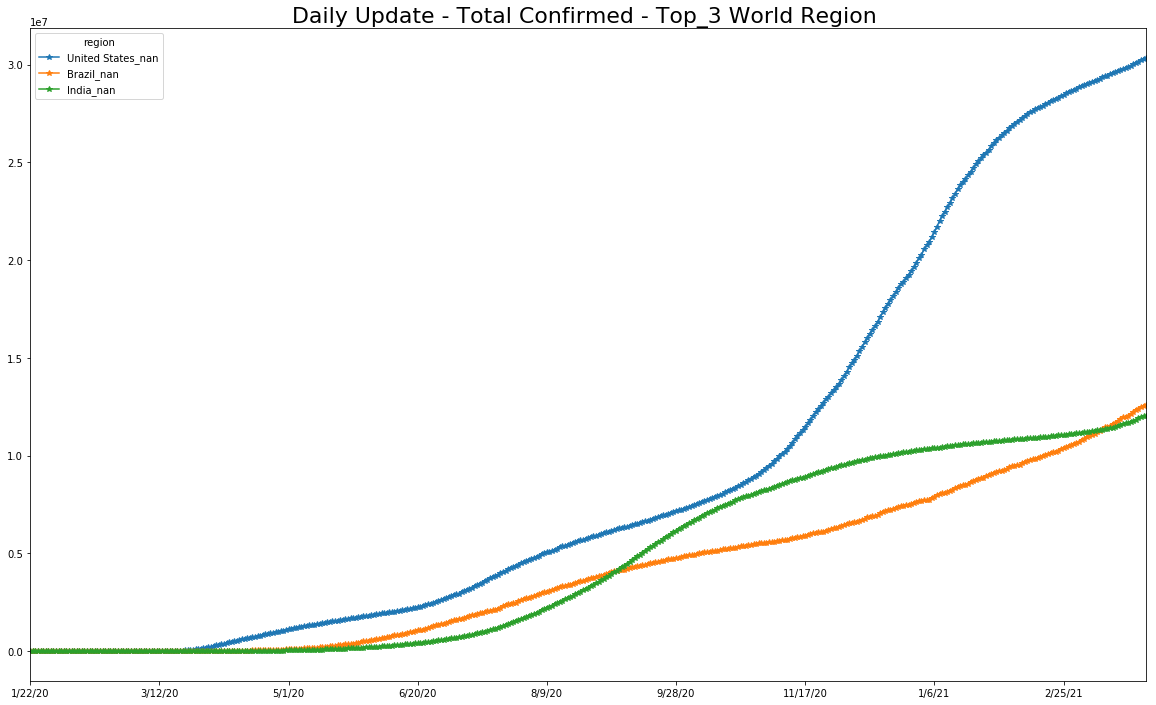

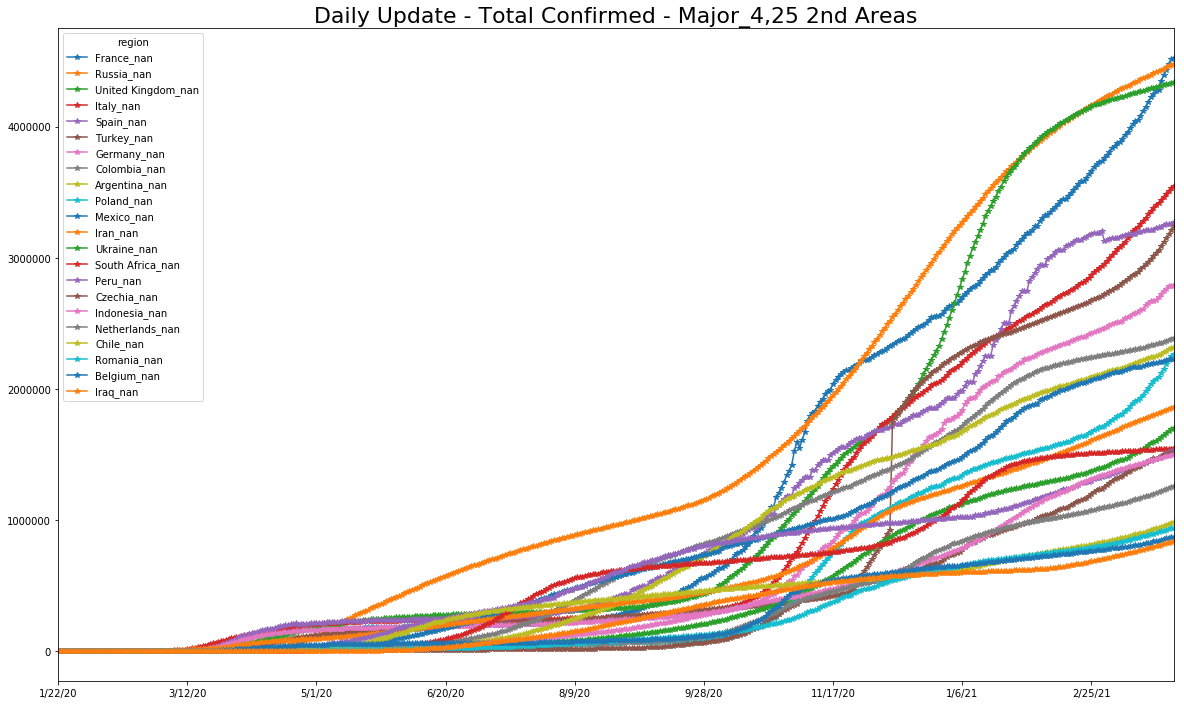

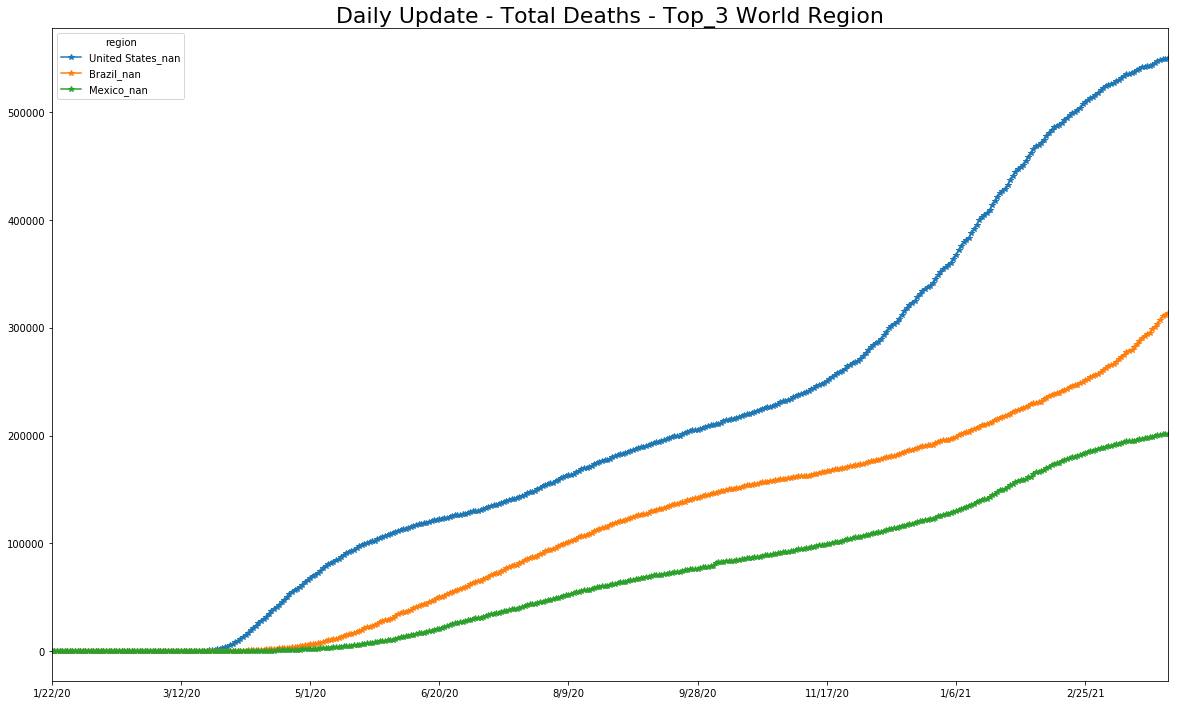

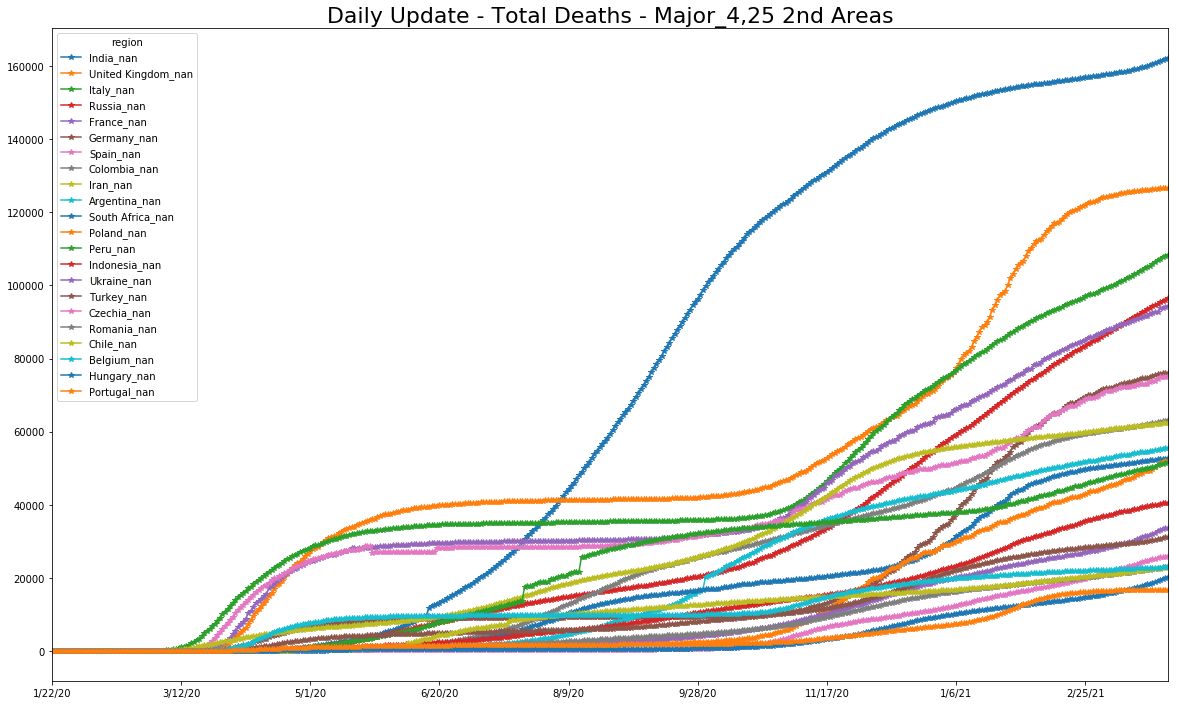

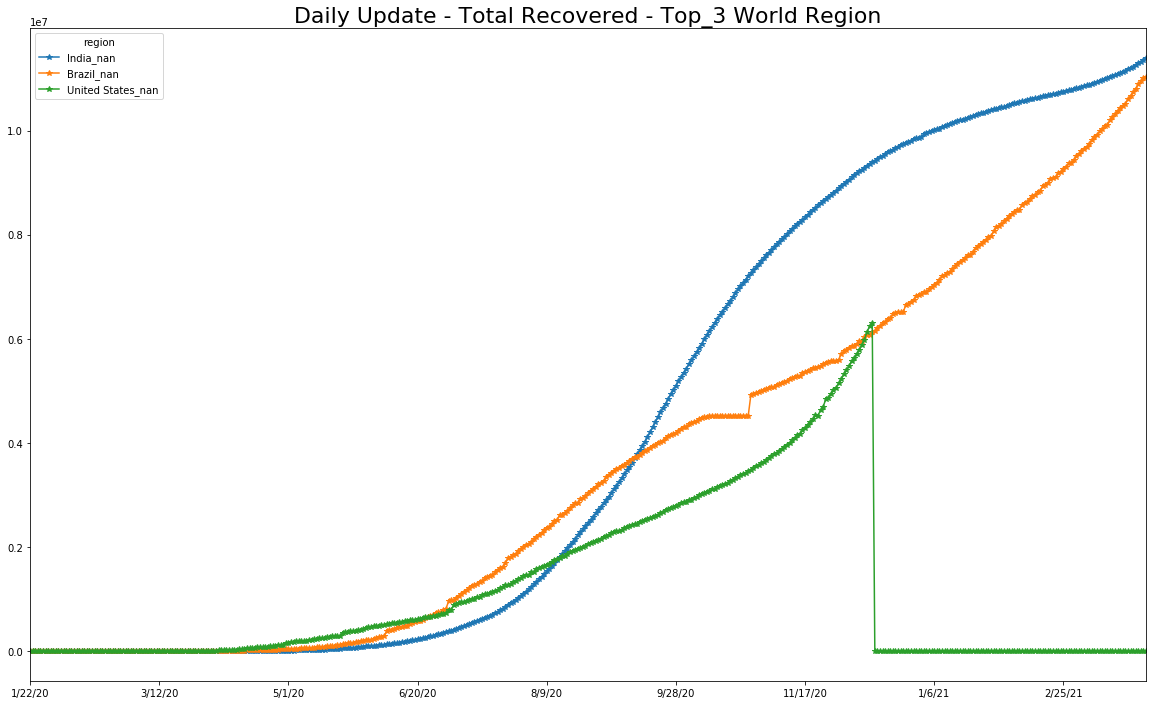

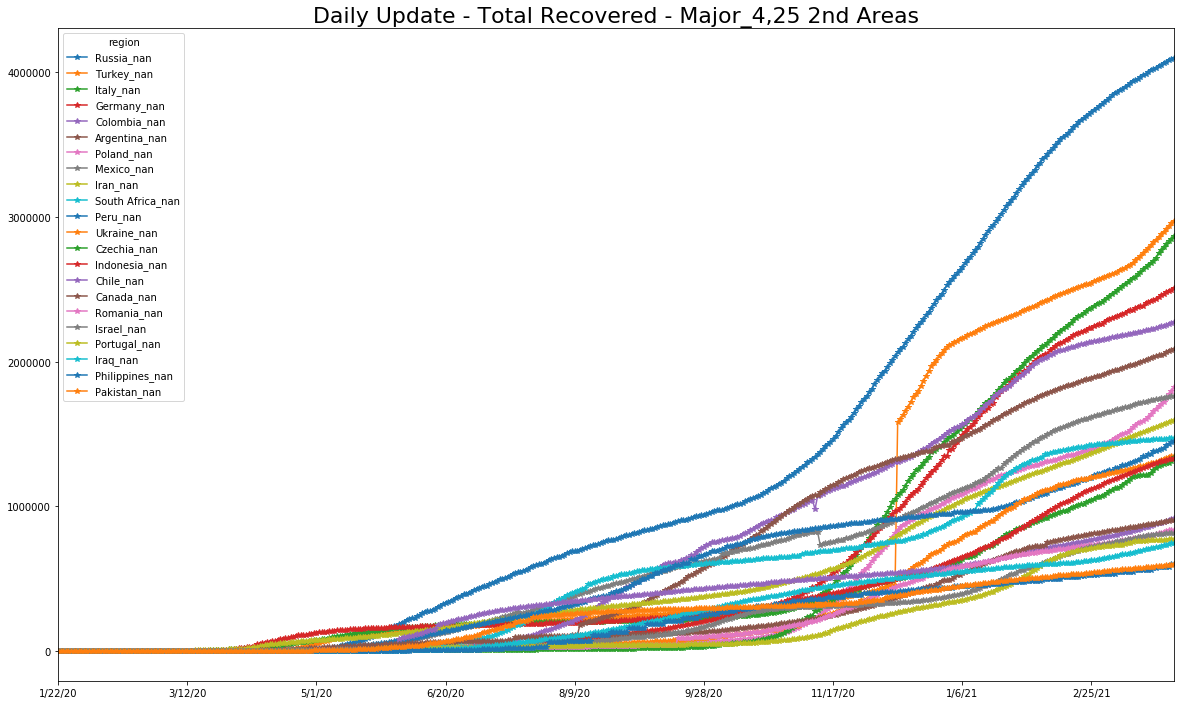

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/03/30


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
## DROP_N=15
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522802         1808           47287            0   
9/14/20  ...            6557228         1812           47836            0   
9/15/20  ...            6596784         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 274 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
3/26/21            56254       123216       116657        11732       21961   
3/27/21            56290       123641       116750        11809       22031   
3/28/21            56294       124134       116836        11850       22063   
3/29/21            56322       124419       116946        11888       22132   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
3/26/21                     1122        2291051       188446   
3/27/21                     1122        2301389       189540   
3/28/21                     1128        2308597       190317   
3/29/21                     1136        2322611       190741   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
3/26/21                                     123                       5281   
3/27/21                                     123                       5281   
3/28/21                                     123                       5283   
3/29/21                                     123                       5288   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
3/26/21  ...           30156621        92343           81960            3   
3/27/21  ...           30218683        95278           82146            3   
3/28/21  ...           30262377        97406           82340            3   
3/29/21  ...           30331025        99584           82536            3   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
3/26/21         154905         2586                  233549       3900   
3/27/21         155663         2586                  234748       3969   
3/28/21         156655         2591                  236462       4033   
3/29/21         157943         2594                  238248       4115   

region   Zambia_nan  Zimbabwe_nan  
3/26/21       87583         36805  
3/27/21       87583         36818  
3/28/21       87872         36822  
3/29/21       88012         36839  

[4 rows x 274 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
55690 2021-03-01     Zimbabwe_nan      36115            31            95   
55691 2021-03-02     Zimbabwe_nan      36148            26            71   
55692 2021-03-03     Zimbabwe_nan      36179            33            90   
55693 2021-03-04     Zimbabwe_nan      36223            31            90   
55694 2021-03-05     Zimbabwe_nan      36248            44           108   
55695 2021-03-06     Zimbabwe_nan      36260            25           100   
55696 2021-03-07     Zimbabwe_nan      36271            12            81   
55697 2021-03-08     Zimbabwe_nan      36289            11            48   
55698 2021-03-09     Zimbabwe_nan      36321            18            41   
55699 2021-03-10     Zimbabwe_nan      36341            32            61   
55700 2021-03-11     Zimbabwe_nan      36377            20            70   
55701 2021-03-12     Zimbabwe_nan      36423            36            88   
55702 2021-03-13     Zimbabwe_nan      36471            46           102   
55703 2021-03-14     Zimbabwe_nan      36484            48           130   
55704 2021-03-15     Zimbabwe_nan      36504            13           107   
55705 2021-03-16     Zimbabwe_nan      36535            20            81   
55706 2021-03-17     Zimbabwe_nan      36552            31            64   
55707 2021-03-18     Zimbabwe_nan      36611            17            68   
55708 2021-03-19     Zimbabwe_nan      36652            59           107   
55709 2021-03-20     Zimbabwe_nan      36662            41           117   
55710 2021-03-21     Zimbabwe_nan      36665            10  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
55719 2021-03-30  Zimbabwe_nan          0            17            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
55719           155         100.046195         100.092406         100.422555   

       last_day  kalman_prediction  population  infected_rate  min  max  
55719     36839            36866.0    14862924       0.000025  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
55719 2021-03-30  Zimbabwe_nan          0            17            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
55719           155         100.046195         100.092406         100.422555   

       last_day  kalman_prediction  population  infected_rate  min  max  
55719     36839            36866.0    14862924       0.000025  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
54523  2021-03-28  Zimbabwe_nan      36822            13            69   
54524  2021-03-29  Zimbabwe_nan      36839             4            44   
54525  2021-03-30  Zimbabwe_nan          0            17            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
54523           156         100.035348         100.187787         100.425536   
54524           157         100.010891         100.119664         100.428229   
54525           155         100.046195         100.092406         100.422555   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
54523                36818  ...    14862924       0.000025  NaN  NaN   
54524                36822  ...    14862924       0.000025  NaN  NaN   
54525                36839  ...    14862924       0.000025  NaN  NaN   

       population_percentage : infected_rate confirmed  \
54523                                         0.002477   
54524                                         0.002478   
54525                                         0.002479   

       population_percentage : factor 9/10 infected_rate confirmed  \
54523                                           0.022295             
54524                                           0.022298             
54525                                           0.022308             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
54523                    29.0                           1.951164   
54524                    34.0                           2.287571   
54525                    27.0                           1.816601   

       delta : roling 7day AVG  \
54523                22.285714   
54524                22.428571   
54525                22.142857   

       delta : aprox 14-day case notification rate per 100k hab  
54523                                           2.099183         
54524                                           2.112639         
54525                                           2.085727         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
264  United States_nan  4.673185e+12  2.161755e+06  184242.10101


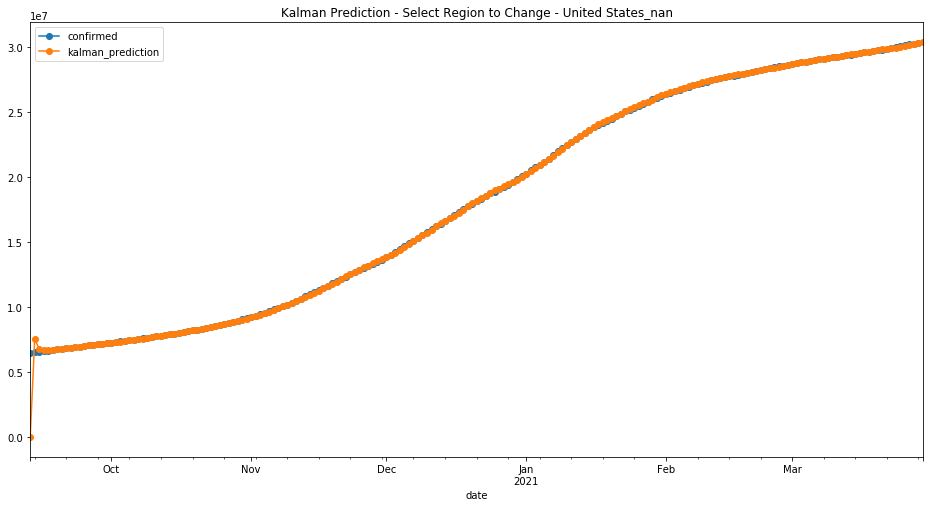

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
213  Russia_nan  1.018269e+11  319103.351649  25469.065657


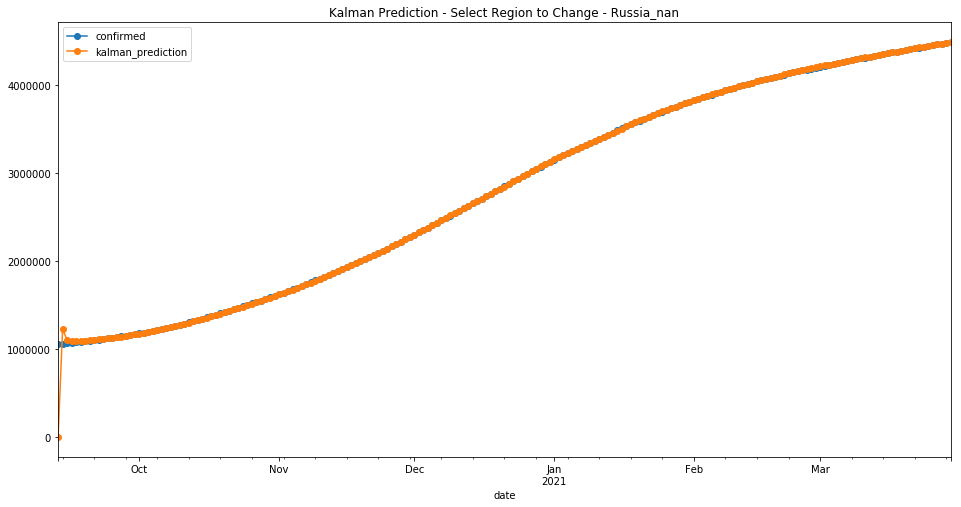

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  8.142132e+11  902337.624685  86283.459596


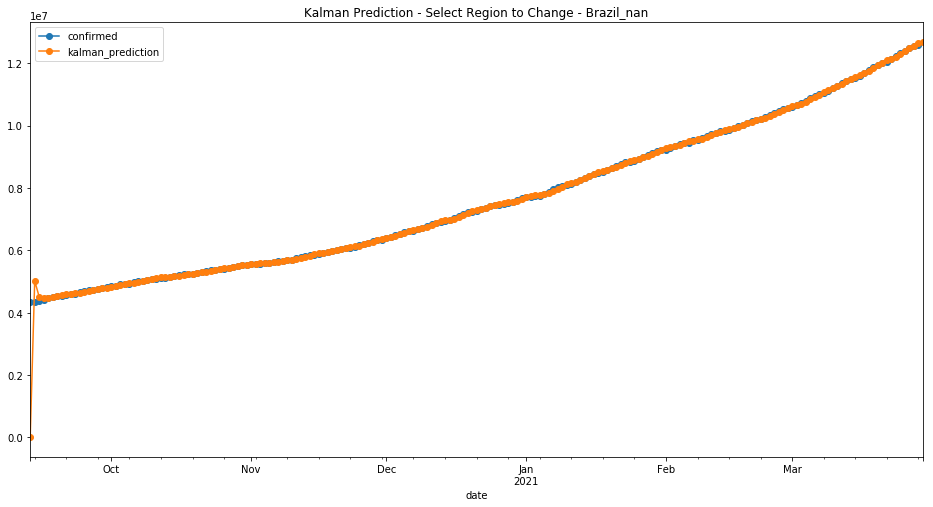

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
263  United Kingdom_nan  9.535797e+10  308800.865179  27444.085859


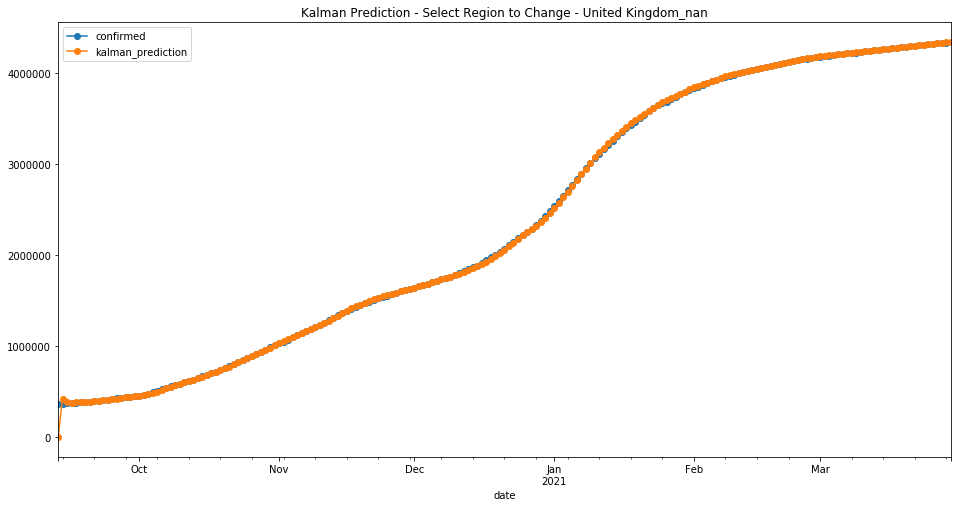

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn8xodoih
  JVM stdout: /tmp/tmpn8xodoih/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpn8xodoih/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         03 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 5 months and 3 days !!!
H2O cluster name:           H2O_from_python_unknownUser_jiepk4
H2O cluster total nodes:    1
H2O cluster free memory:    3.543 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-03-23
last_train_date= 2021-03-29
first_bootstrap_date= 2021-03-21
boost_bootstrap_date= 2021-03-26
first_test_date= 2021-03-20
last_test_date= 2021-03-30
first_valid_date= 2021-03-28


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    56278.0      56103 2021-03-21  Afghanistan_nan
1    56295.0      56153 2021-03-22  Afghanistan_nan
2    56335.0      56177 2021-03-23  Afghanistan_nan
3    56364.0      56192 2021-03-24  Afghanistan_nan
4    56388.0      56226 2021-03-25  Afghanistan_nan
5    56417.0      56254 2021-03-26  Afghanistan_nan
6    56447.0      56290 2021-03-27  Afghanistan_nan
7    56483.0      56294 2021-03-28  Afghanistan_nan
8    56494.0      56322 2021-03-29  Afghanistan_nan
9    56519.0          0 2021-03-30  Afghanistan_nan
10  121137.0     121200 2021-03-21      Albania_nan
11  121773.0     121544 2021-03-22      Albania_nan
12  122125.0     121847 2021-03-23      Albania_nan
13  122446.0     122295 2021-03-24      Albania_nan
14  122849.0     122767 2021-03-25      Albania_nan
15  123286.0     123216 2021-03-26      Albania_nan
16  123718.0     123641 2021-03-27      Albania_nan
17  124137.0     124134 2021-03-28      Albania_nan
18  124634.0     124419 2021-03-29      Albania_nan
19  124920.0          0 2021-03-30      Albania_nan
20  116360.0     116157 2021-03-21      Algeria_nan
21  116449.0     116255 2021-03-22      Algeria_nan
22  116538.0     116349 2021-03-23      Algeria_nan
23  116623.0     116438 2021-03-24      Algeria_nan
24  116706.0     116543 2021-03-25      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  251978.0     252680 2021-03-26  Azerbaijan_nan
176  253790.0     254370 2021-03-27  Azerbaijan_nan
177  255581.0     256201 2021-03-28  Azerbaijan_nan
178  257546.0     257330 2021-03-29  Azerbaijan_nan
179  258743.0          0 2021-03-30  Azerbaijan_nan
180    8980.0       8800 2021-03-21     Bahamas_nan
181    8974.0       8923 2021-03-22     Bahamas_nan
182    8808.0       8935 2021-03-23     Bahamas_nan
183    9099.0       8935 2021-03-24     Bahamas_nan
184    9147.0       8935 2021-03-25     Bahamas_nan
185    9121.0       8935 2021-03-26     Bahamas_nan
186    9117.0       8935 2021-03-27     Bahamas_nan
187    9111.0       8935 2021-03-28     Bahamas_nan
188    9104.0       9000 2021-03-29     Bahamas_nan
189    9016.0          0 2021-03-30     Bahamas_nan
190  135972.0     135982 2021-03-21     Bahrain_nan
191  136643.0     136741 2021-03-22     Bahrain_nan
192  137425.0     137550 2021-03-23     Bahrain_nan
193  138228.0     138283 2021-03-24     Bahrain_nan
194  138981.0     139124 2021-03-25     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  310412.0     310445 2021-03-21  Belarus_nan
221  311629.0     311428 2021-03-22  Belarus_nan
222  312667.0     312474 2021-03-23  Belarus_nan
223  313730.0     313852 2021-03-24  Belarus_nan
224  315103.0     314993 2021-03-25  Belarus_nan
225  316204.0     316418 2021-03-26  Belarus_nan
226  317682.0     317631 2021-03-27  Belarus_nan
227  318881.0     318681 2021-03-28  Belarus_nan
228  319963.0     319599 2021-03-29  Belarus_nan
229  320868.0          0 2021-03-30  Belarus_nan
230  831349.0     837006 2021-03-21  Belgium_nan
231  841741.0     839238 2021-03-22  Belgium_nan
232  842570.0     842775 2021-03-23  Belgium_nan
233  847123.0     849090 2021-03-24  Belgium_nan
234  853561.0     854608 2021-03-25  Belgium_nan
235  858981.0     860731 2021-03-26  Belgium_nan
236  865551.0     866063 2021-03-27  Belgium_nan
237  870739.0     870757 2021-03-28  Belgium_nan
238  876048.0     872936 2021-03-29  Belgium_nan
239  878013.0          0 2021-03-30  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  6341040028.230453
# MSE on the validation data =  11990955250924.893
# R^2 on the training data =  0.9995762129907828
# R^2 on the validation data =  0.43236291524745407


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1617082796680_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6341040028.230453
RMSE: 79630.64754370927
MAE: 7325.009913718144
RMSLE: 0.2089838727569671
Mean Residual Deviance: 6341040028.230453

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 11990955250924.893
RMSE: 3462795.8719689054
MAE: 884301.2849688601
RMSLE: 7.580860958017824
Mean Residual Deviance: 11990955250924.893
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae     validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  -----------------  ---------------------
     2021-03-30 05:40:06  0.069 sec   0.0                nan                 nan                 nan                  nan                 nan                nan
     2021-03-30 05:40:06  0.486 sec   1.0                104757.40542914461  17988.394902879216  10974113992.246176   3418792.4397607017  868299.184423292   11688141746164.932
     2021-03-30 05:40:06  0.636 sec   2.0                112034.55229656008  16392.17309273207   12551740908.290657   3441664.334954517   871775.2108961226  11845053394497.918
     2021-03-30 05:40:07  0.755 sec   3.0                107966.9378156542   16478.3263880008    11656859661.289341   3453696.188563917   875809.9417368114  11928017362900.928
     2021-03-30 05:40:07  0.958 sec   4.0                105401.01197587368  16376.257702428435  11109373325.538267   3453247.1718809856  876706.6794999269  11924916030104.025
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                ---
     2021-03-30 05:40:22  16.099 sec  245.0              80892.20607231639   7967.671642842399   6543549003.246101    3453739.117788624   881833.4280701653  11928313893743.344
     2021-03-30 05:40:26  20.100 sec  330.0              82383.79851446964   7705.833446355199   6787090257.6727295   3458020.3705254258  882702.6965931191  11957904882968.803
     2021-03-30 05:40:30  24.135 sec  413.0              82644.10477329246   7560.499887442733   6830048053.778941    3461109.9982567327  883431.1549035845  11979282420032.72
     2021-03-30 05:40:34  28.143 sec  496.0              79616.6861660914    7336.751842935638   6338816716.069889    3463014.374429707   884348.4361250197  11992468557506.773
     2021-03-30 05:40:35  28.733 sec  500.0              79630.64754370927   7325.009913718144   6341040028.230453    3462795.8719689054  884301.2849688601  11990955250924.893


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           1.84084e+19            1                    0.361098
kalman_prediction  1.48743e+19            0.808017             0.291773
region             6.88618e+18            0.374078             0.135079
7_day_change       3.50752e+18            0.190539             0.0688033
3_day_change       2.79096e+18            0.151614             0.0547473
infected_rate      1.78598e+18            0.09702              0.0350337
1_day_change       8.60288e+17            0.0467334            0.0168753
max                7.99221e+17            0.0434161            0.0156774
min                7.90496e+17            0.0429421            0.0155063
7_day_change_rate  1.5499e+17             0.0084195            0.00304026
3_day_change_rate  7.47808e+16            0.00406232           0.00146689
1_day_change_rate  4.58931e+16            0.00249305           0.000900235

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         1.840841e+19           1.000000    0.361098
1   kalman_prediction         1.487431e+19           0.808017    0.291773
2              region         6.886180e+18           0.374078    0.135079
3        7_day_change         3.507524e+18           0.190539    0.068803
4        3_day_change         2.790963e+18           0.151614    0.054747
5       infected_rate         1.785983e+18           0.097020    0.035034
6        1_day_change         8.602881e+17           0.046733    0.016875
7                 max         7.992211e+17           0.043416    0.015677
8                 min         7.904956e+17           0.042942    0.015506
9   7_day_change_rate         1.549896e+17           0.008420    0.003040
10  3_day_change_rate         7.478081e+16           0.004062    0.001467
11  1_day_change_rate         4.589310e+16           0.002493    0.000900

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


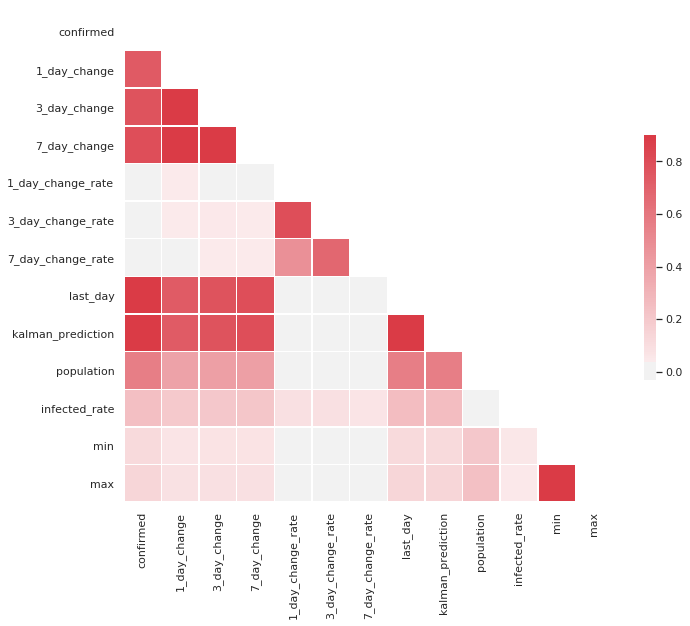

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.736565
3_day_change         0.777631
7_day_change         0.795567
1_day_change_rate    0.022735
3_day_change_rate    0.020954
7_day_change_rate    0.013834
last_day             0.993410
kalman_prediction    0.993816
population           0.566080
infected_rate        0.249792
min                  0.119006
max                  0.140628
Name: confirmed, dtype: float64


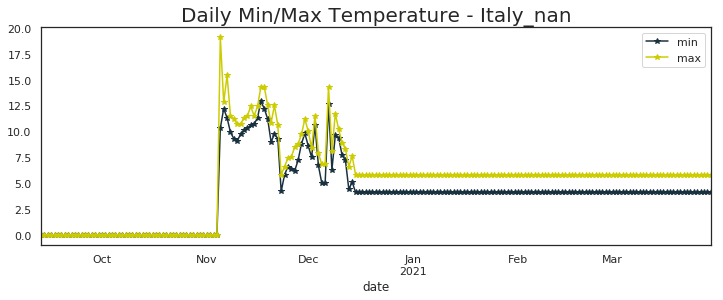

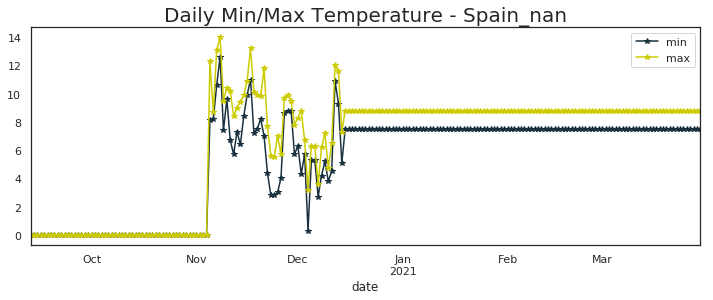

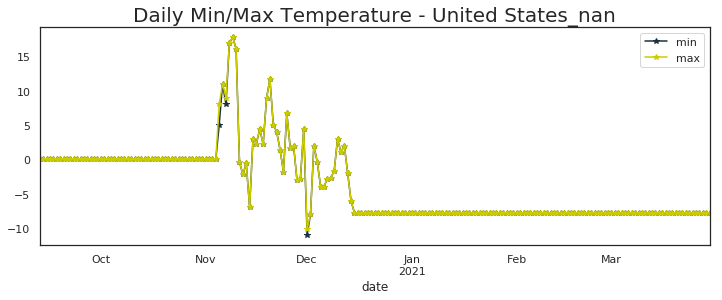

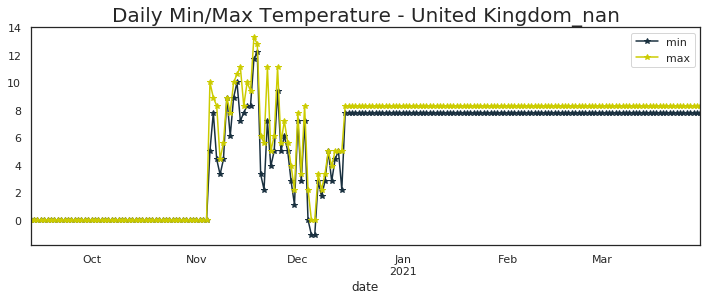

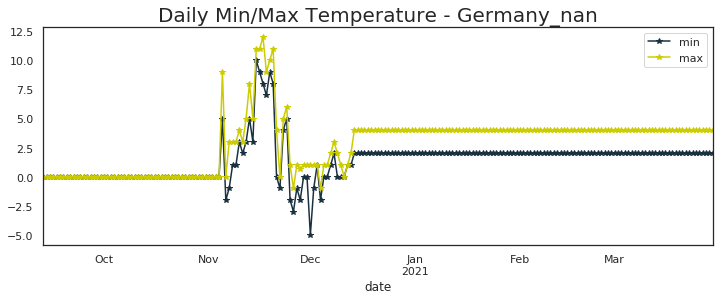

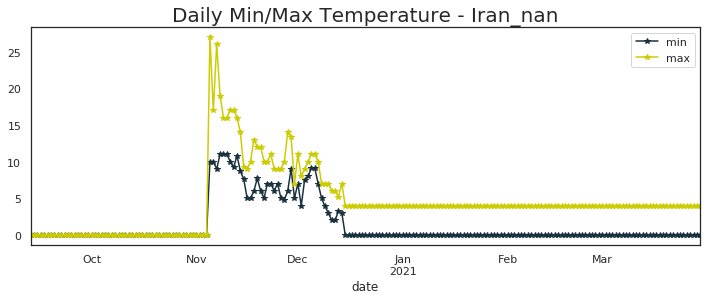

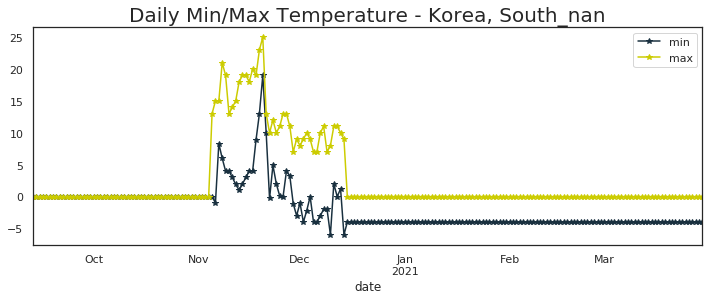

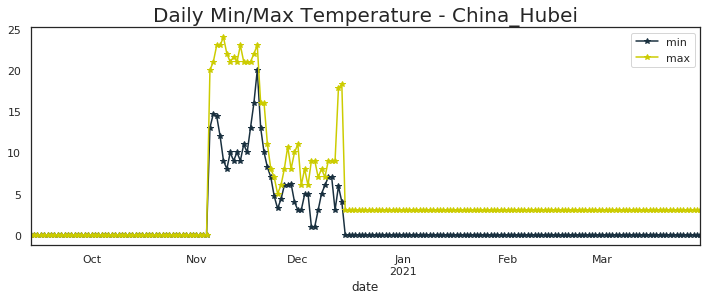

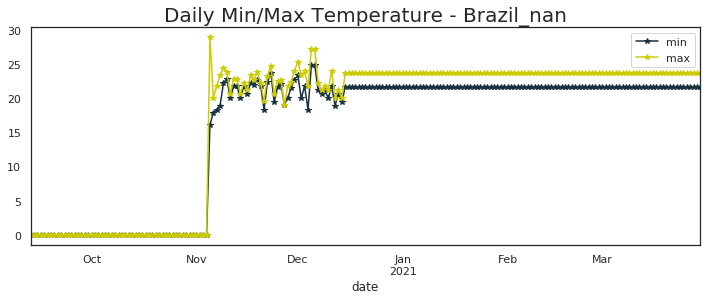

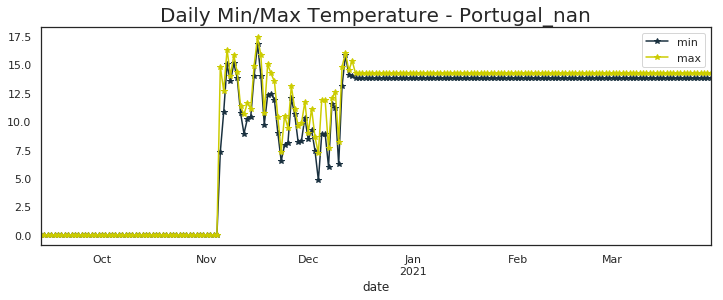

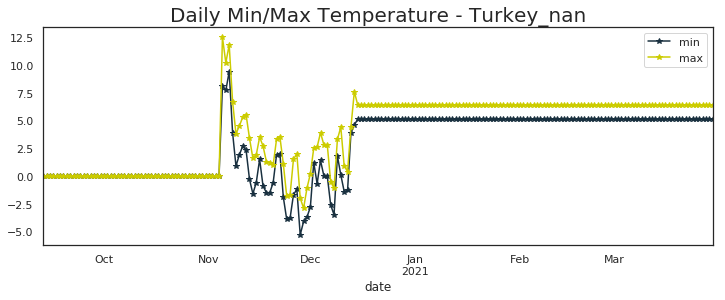

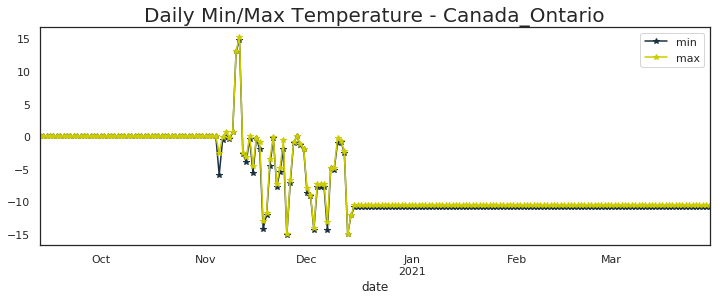

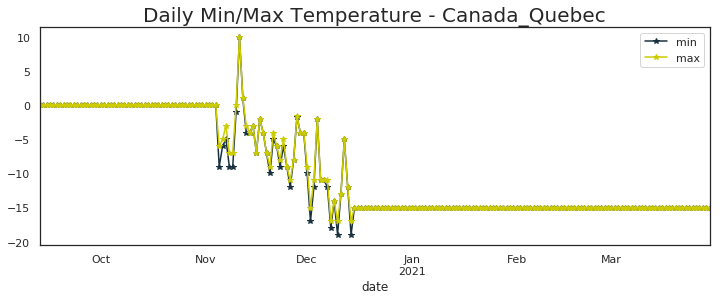

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
Brazil_nan                  24.8  28.9
India_nan                   22.0  31.0
France_nan                  12.1  13.3
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Turkey_nan                   9.4  12.5
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Poland_nan                   8.9  10.6
Mexico_nan                  15.1  15.1
Iran_nan                    11.0  27.0
Ukraine_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Peru_nan                    24.6  29.9
Czechia_nan                  0.0   0.0
Indonesia_nan                0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Romania_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

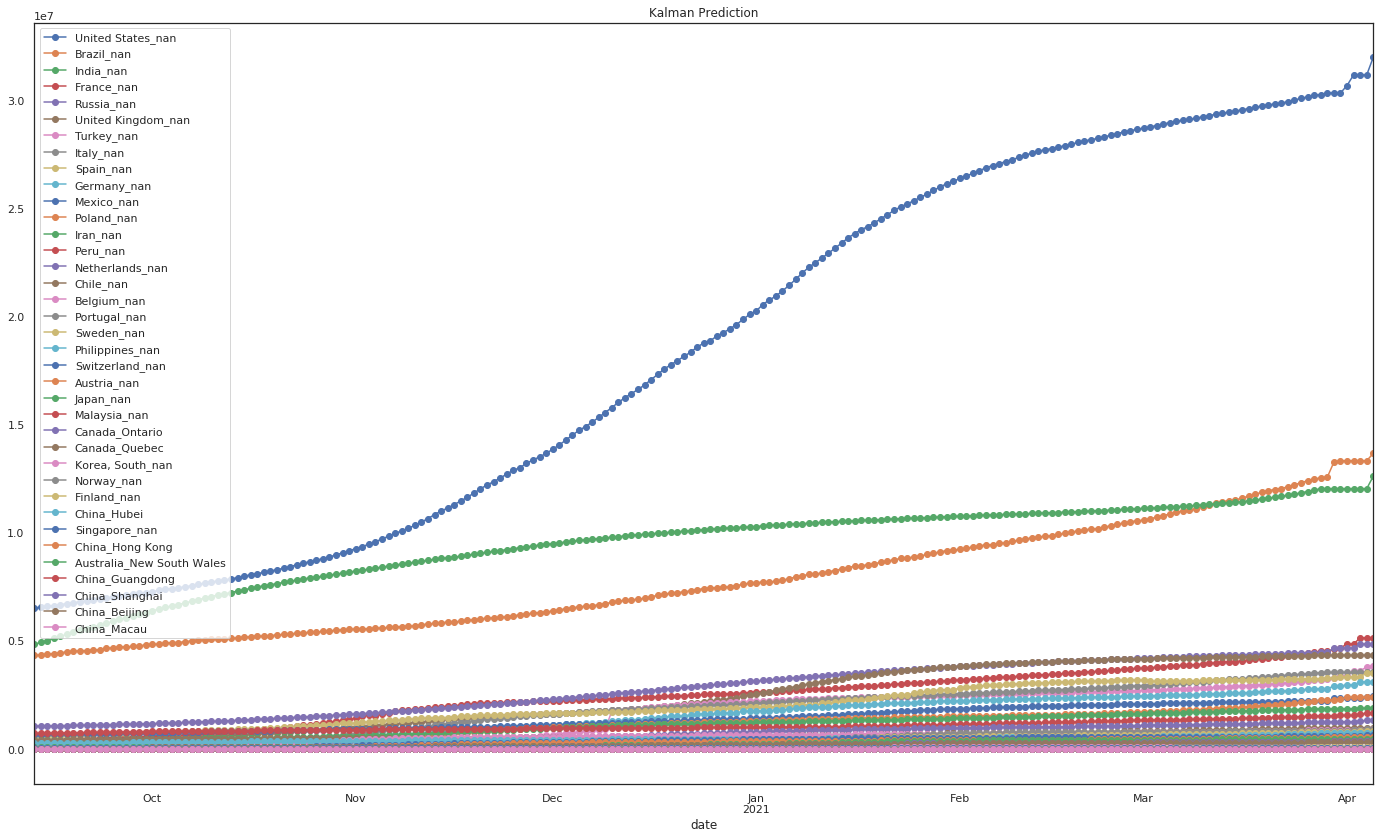

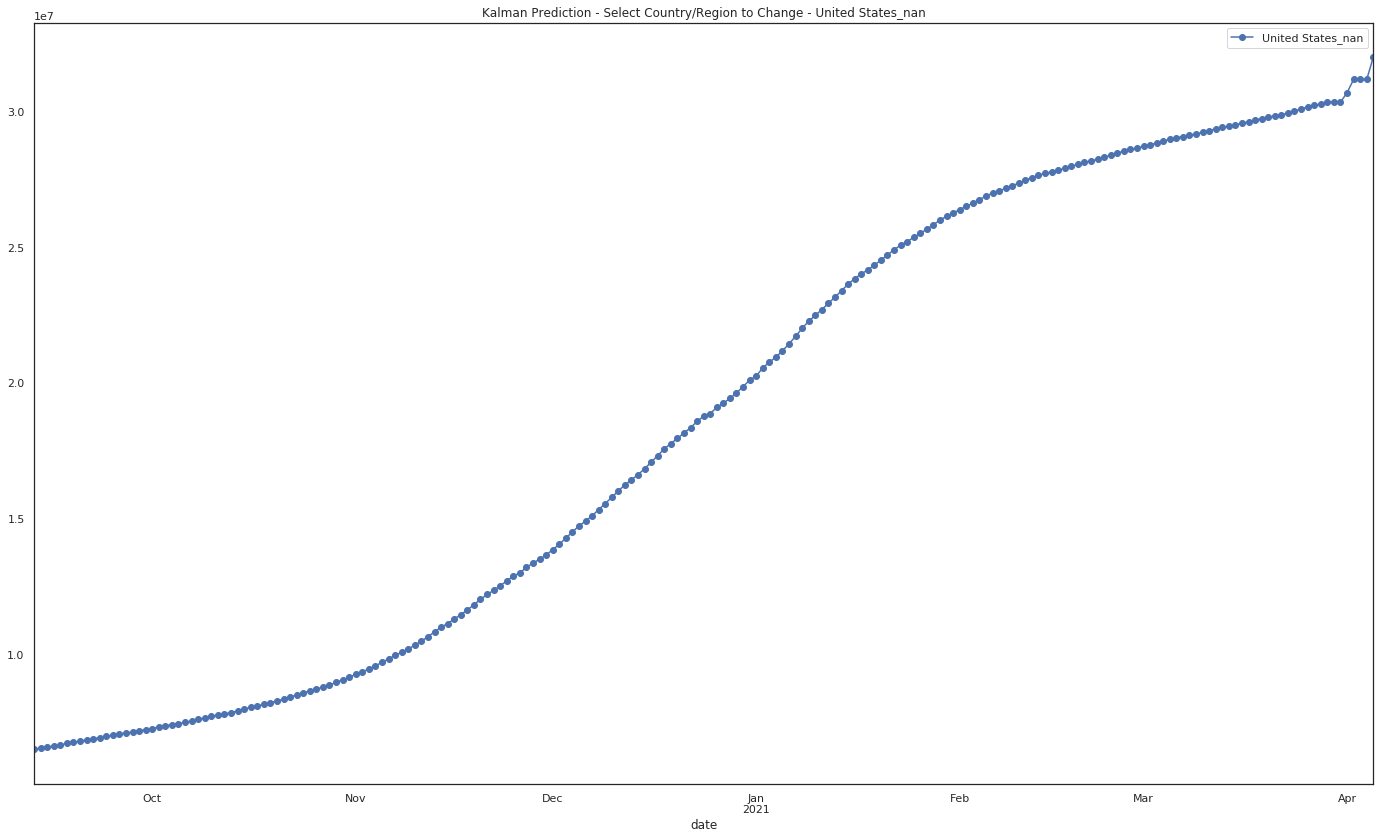

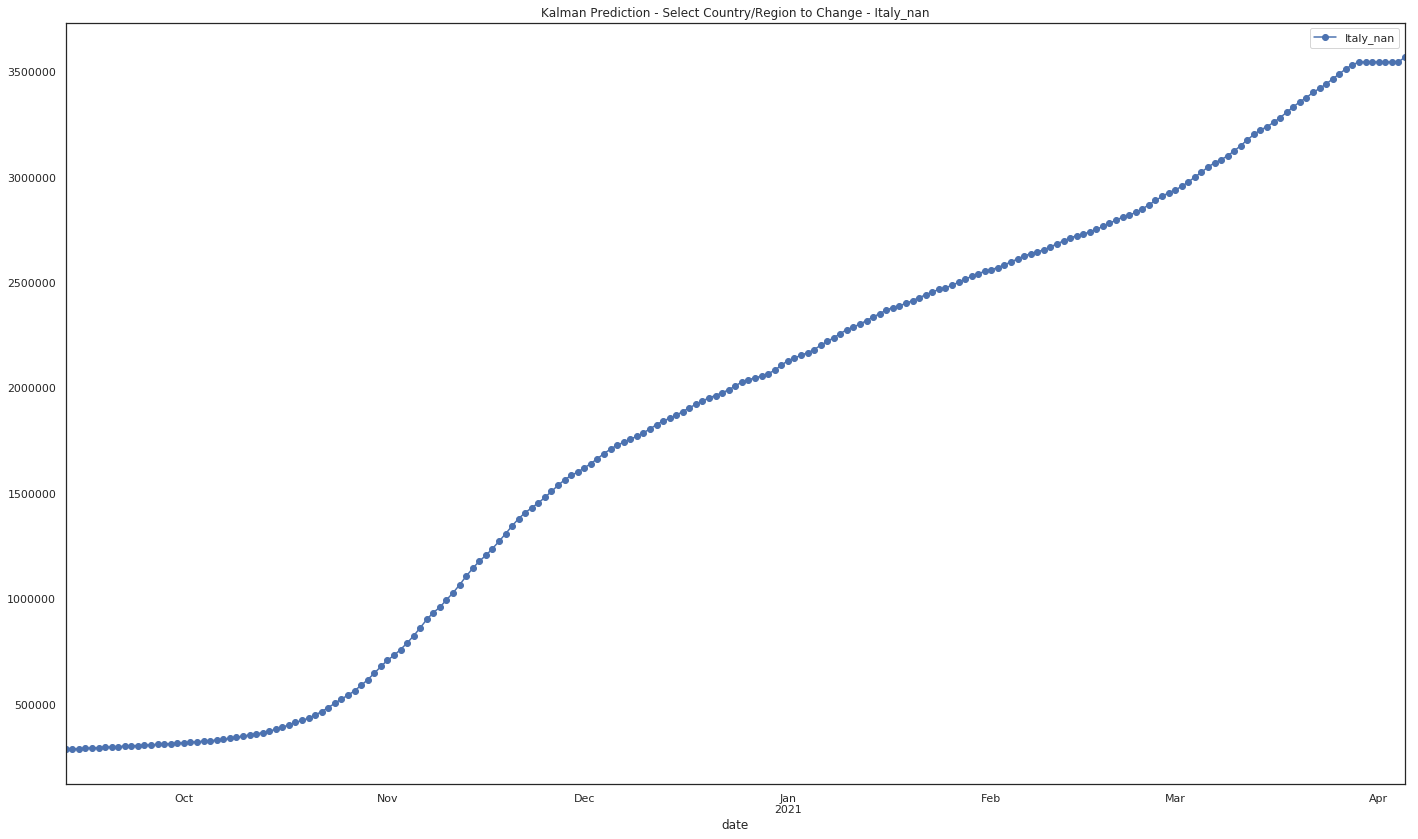

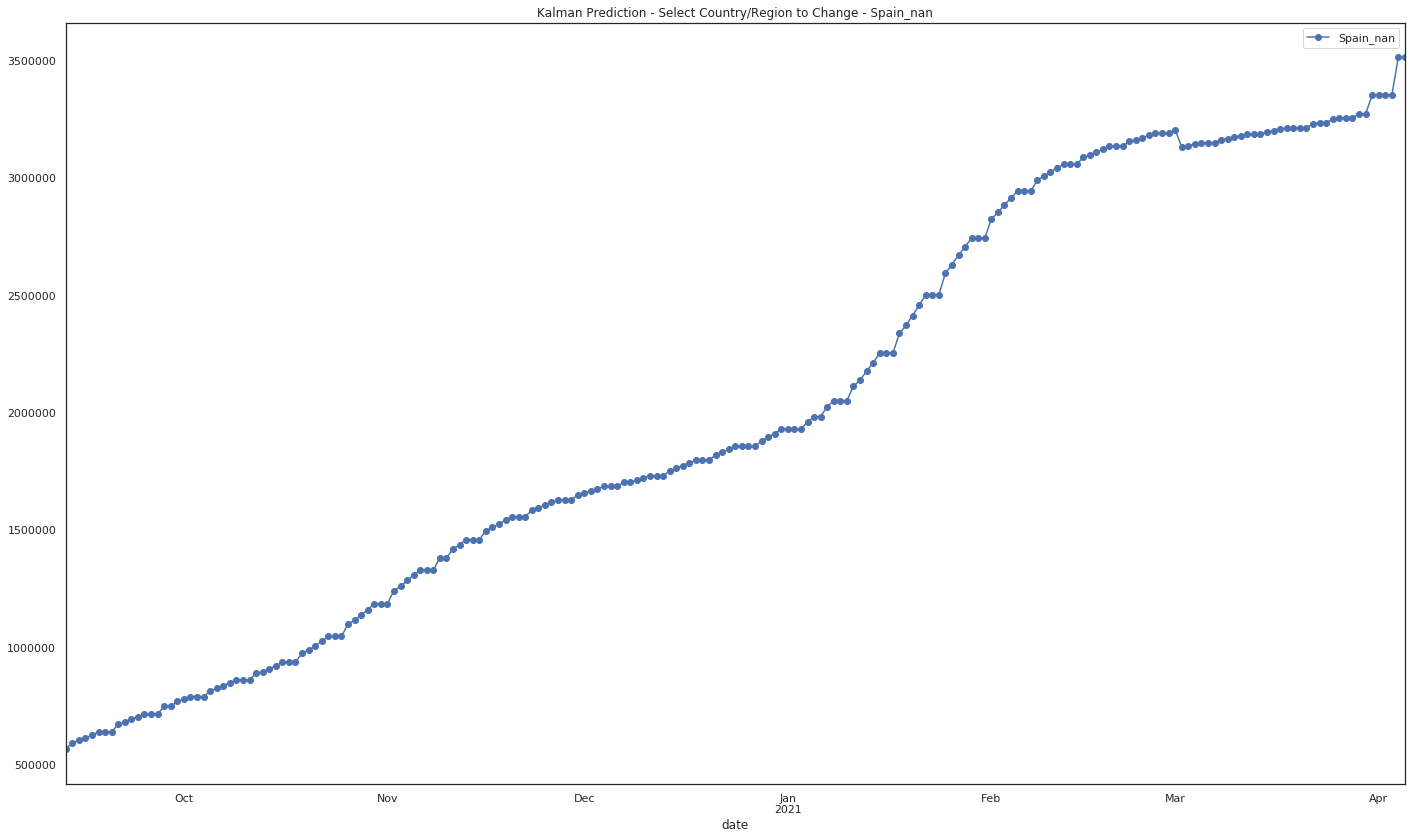

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


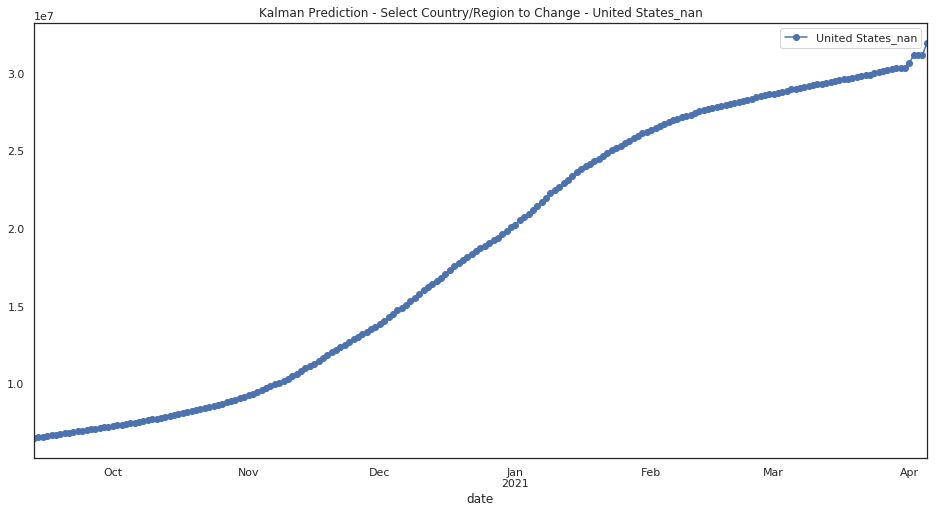

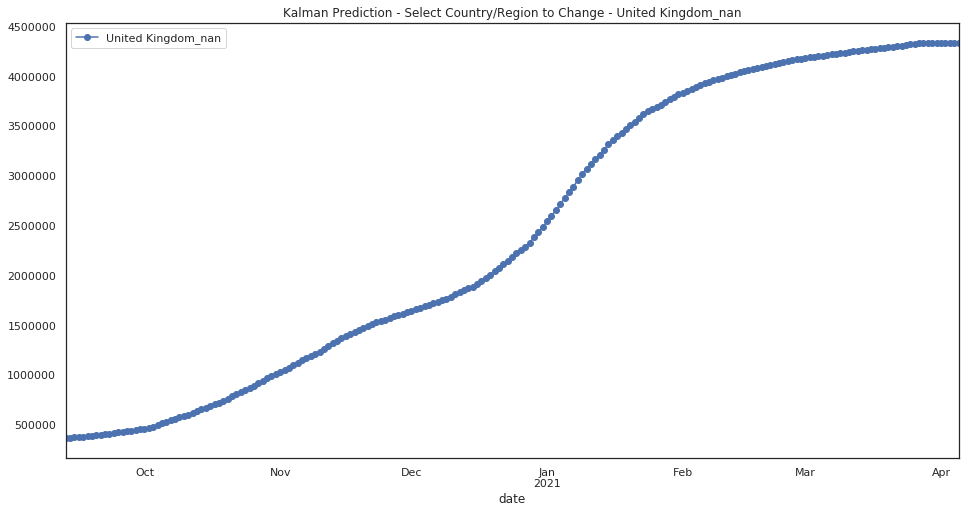

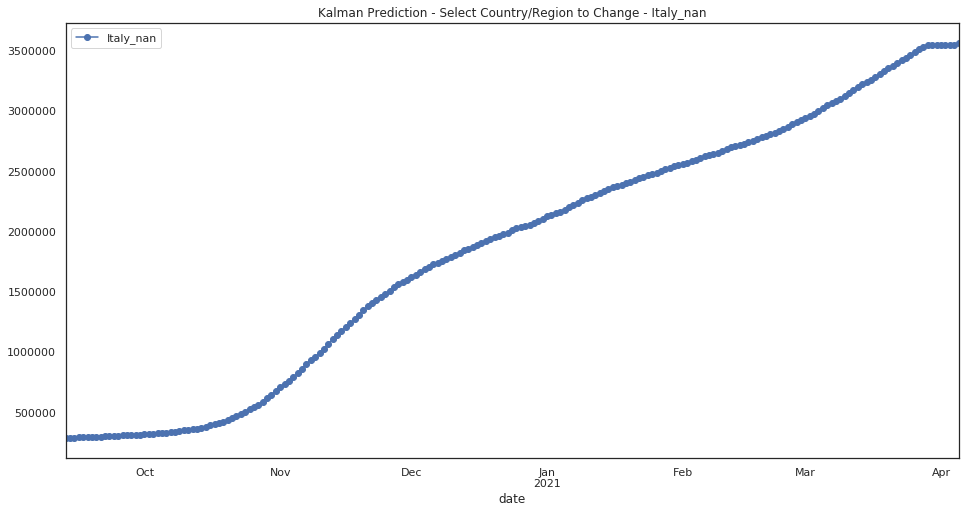

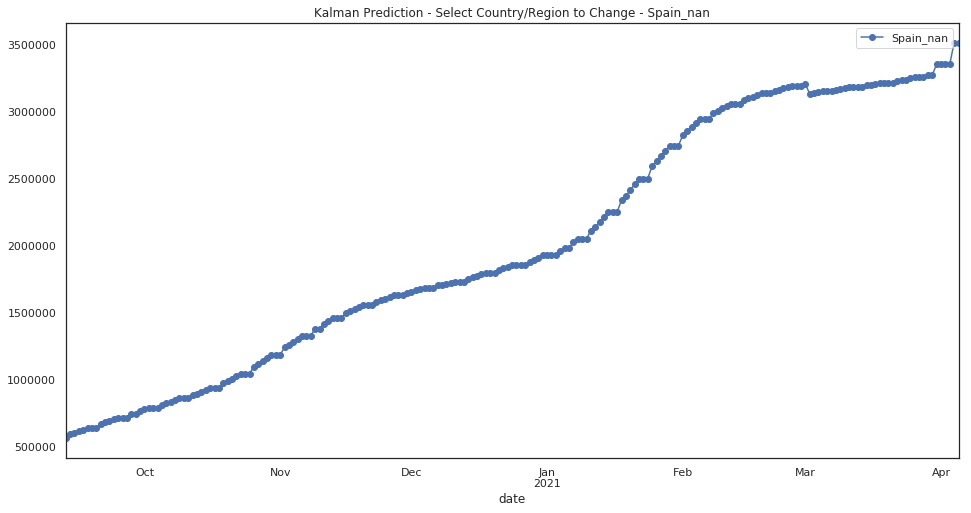

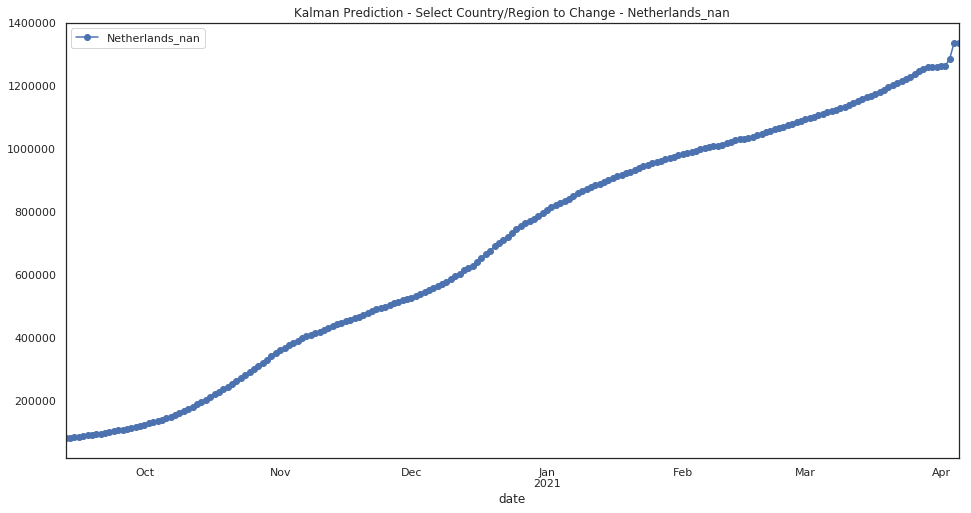

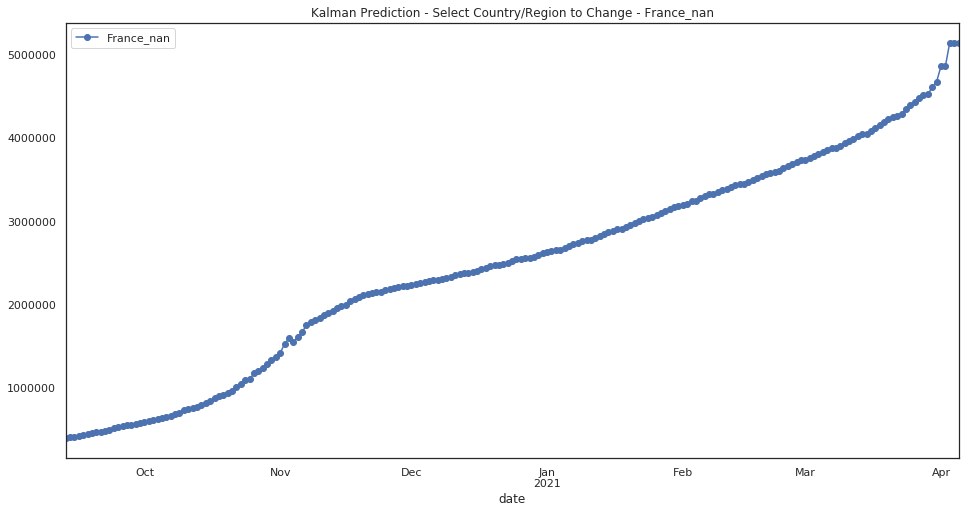

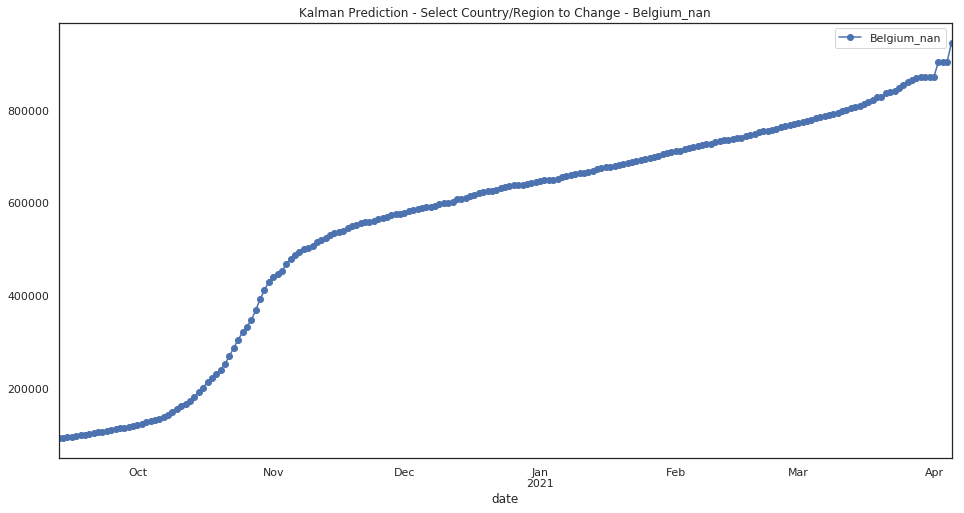

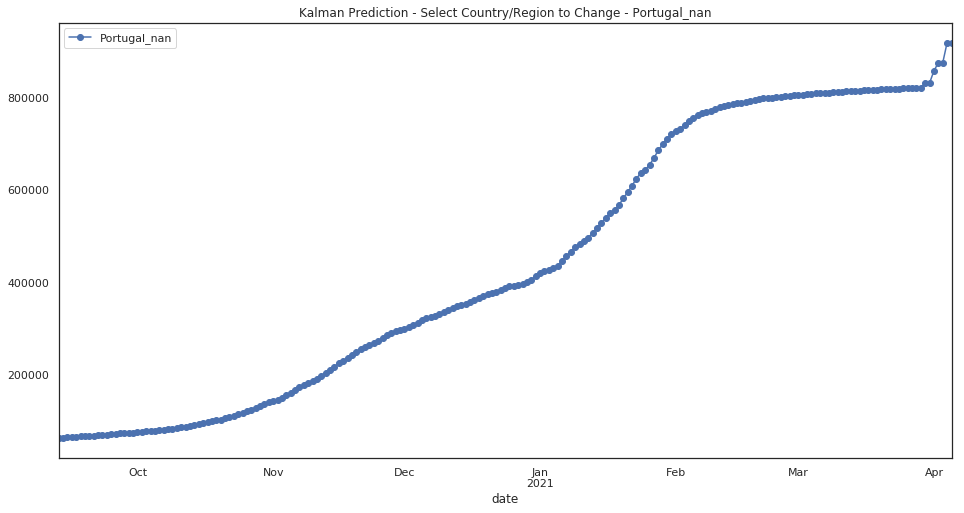

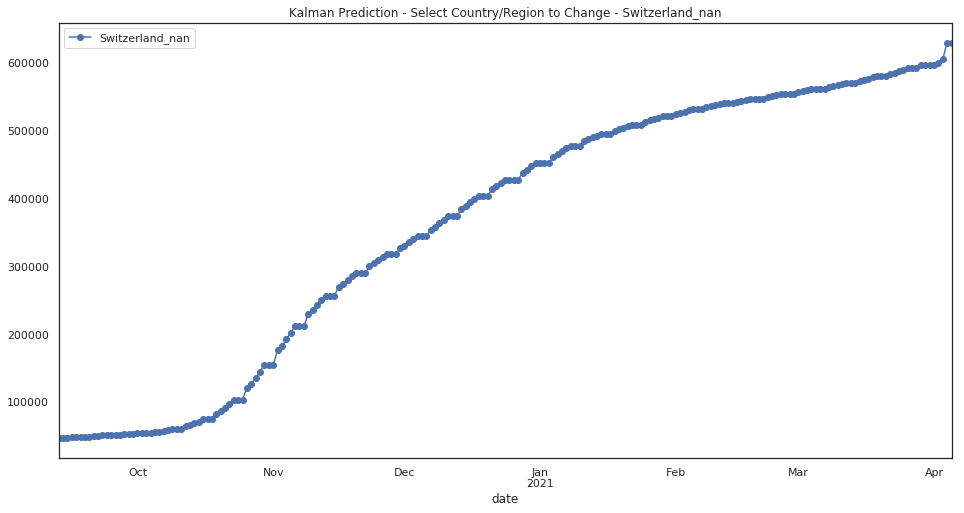

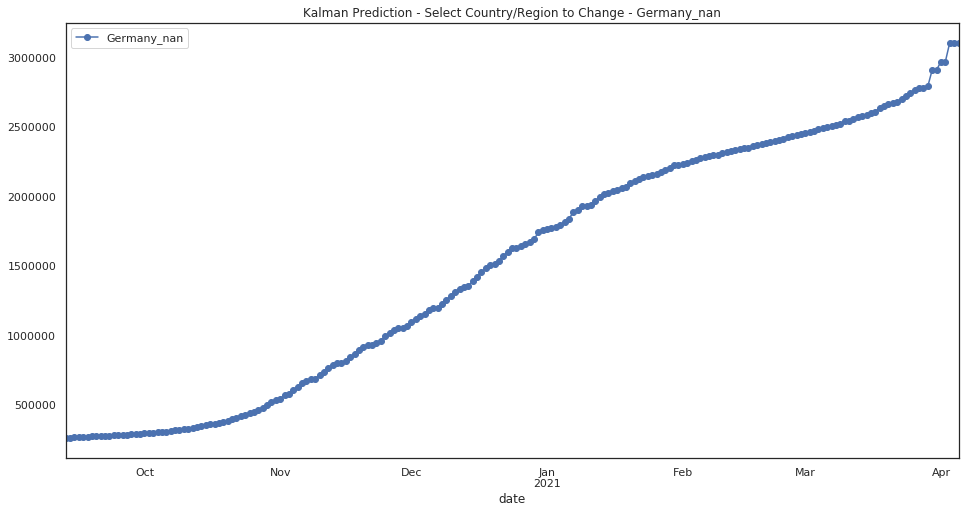

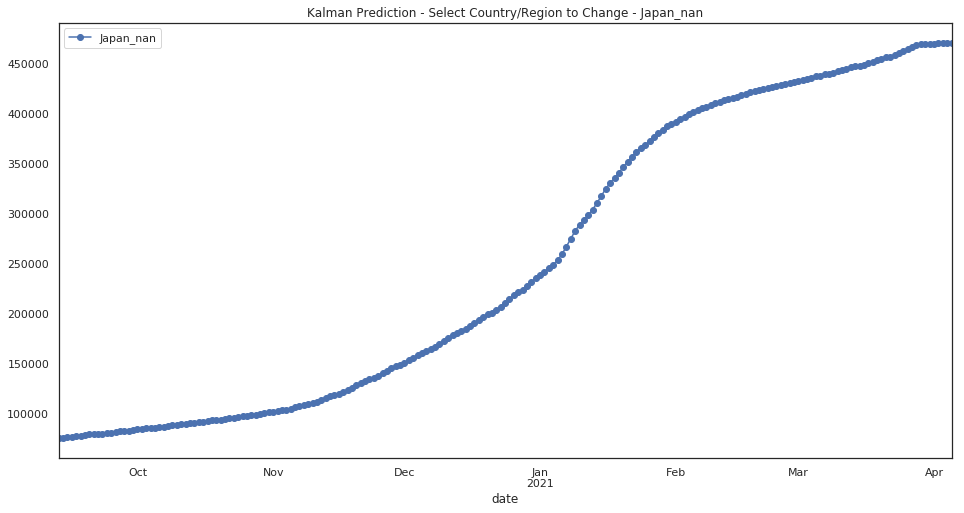

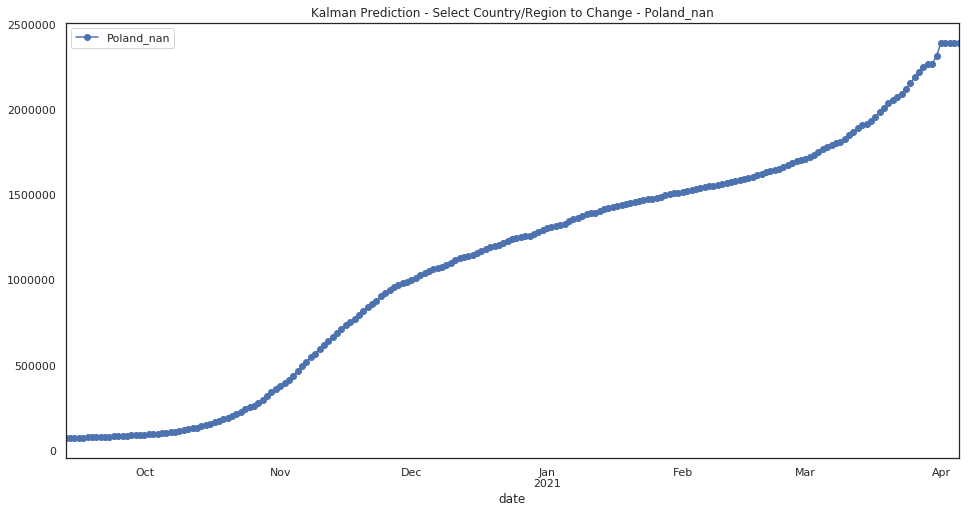

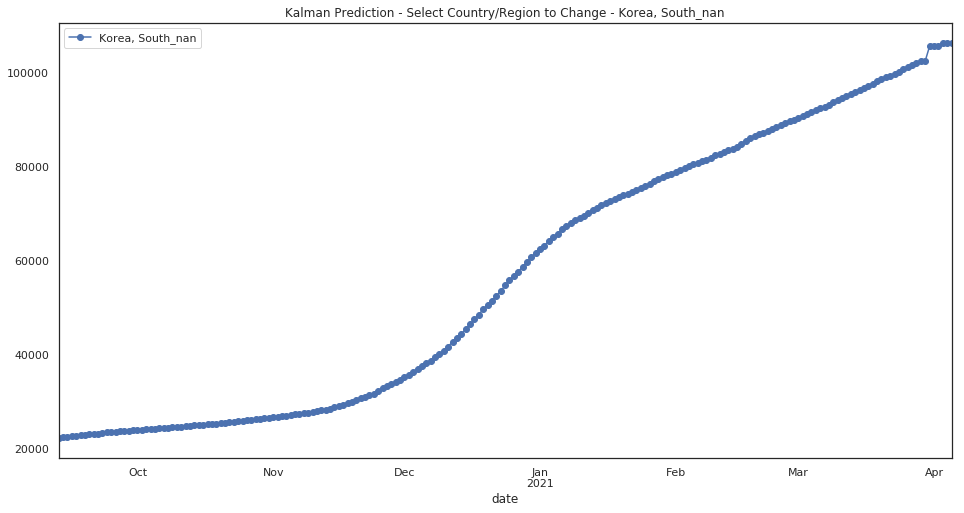

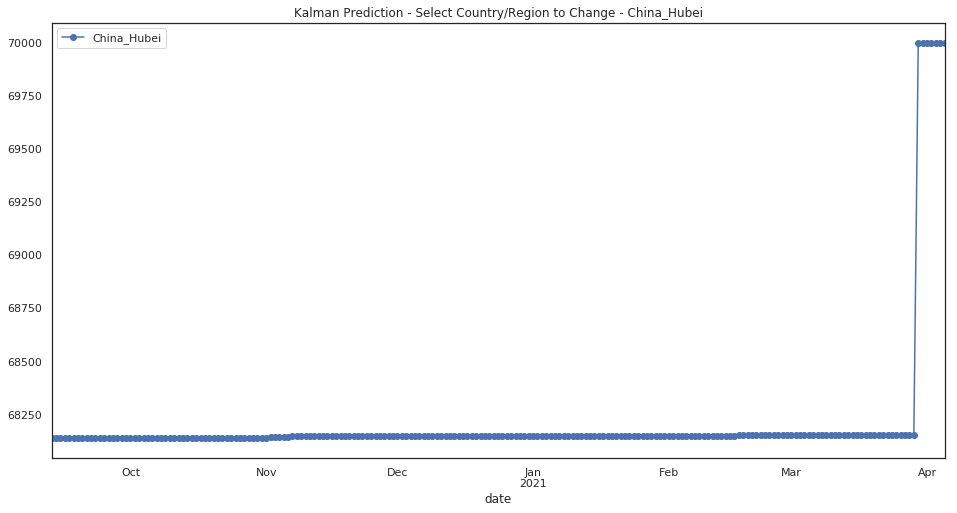

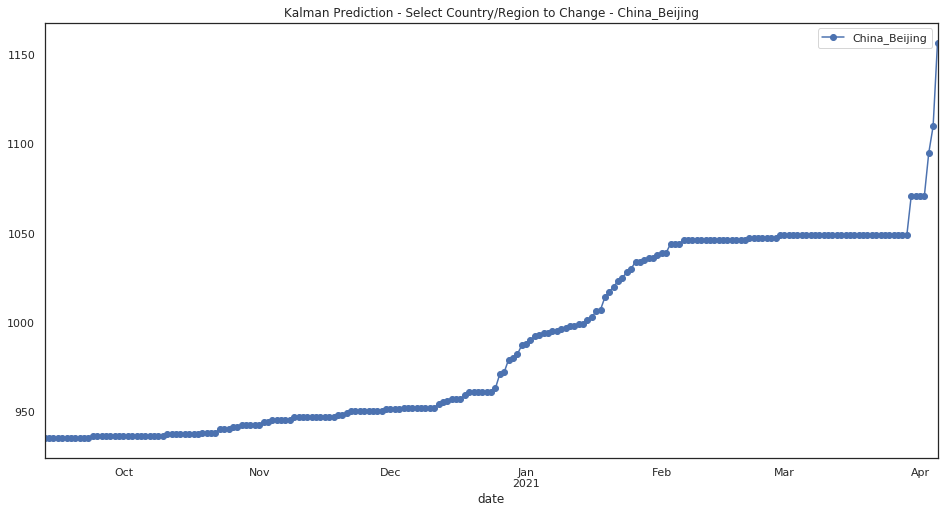

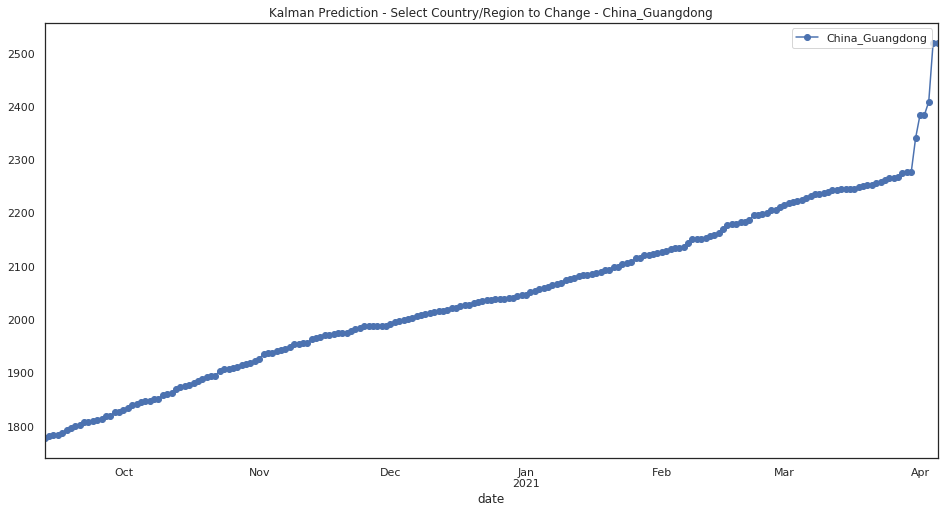

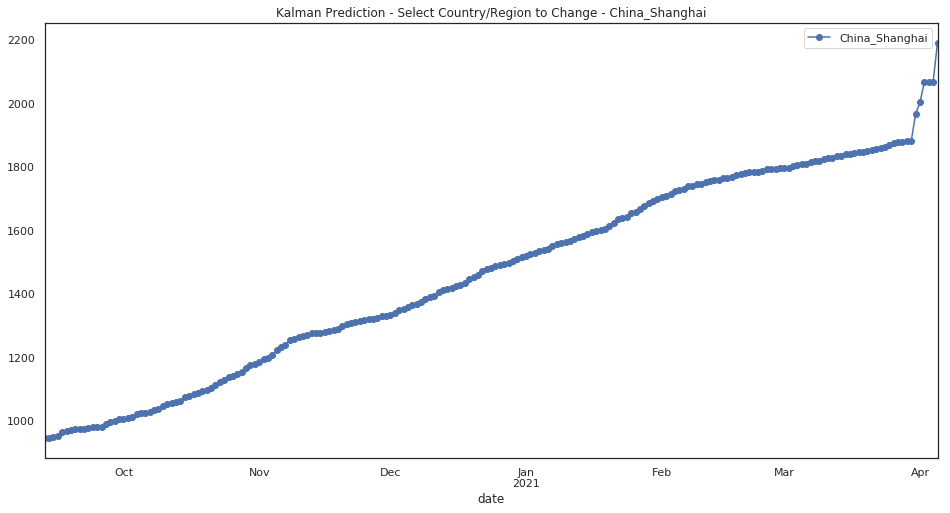

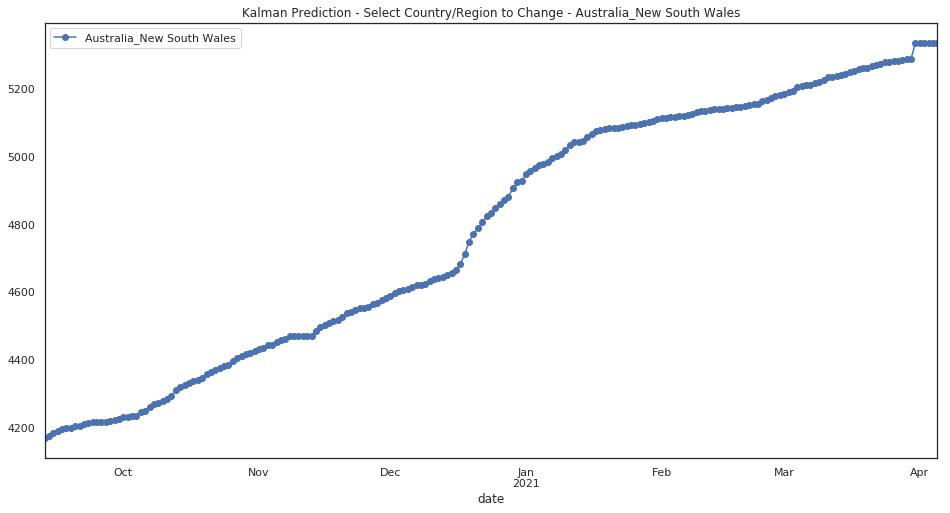

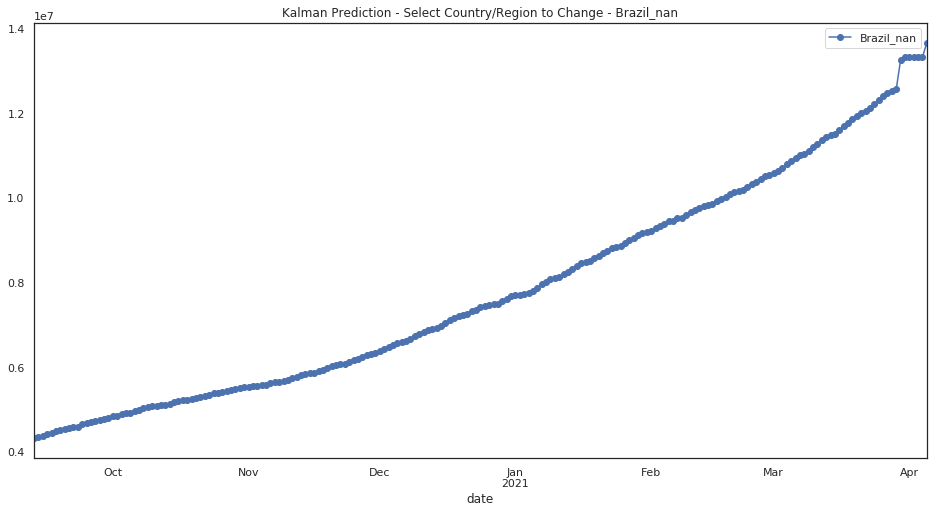

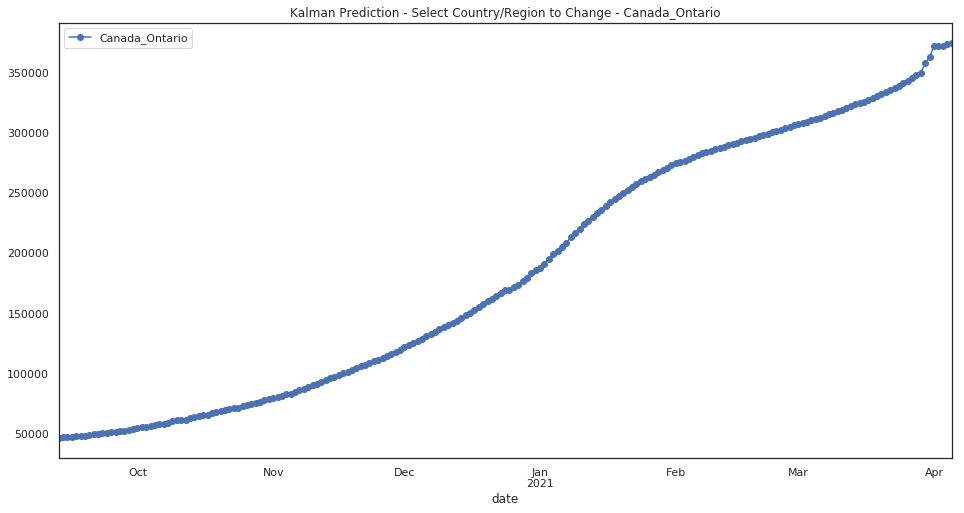

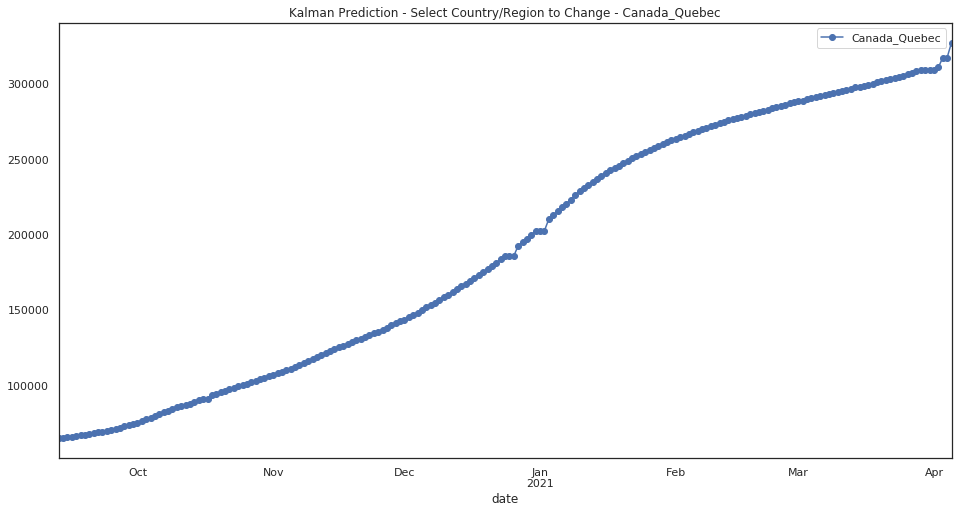

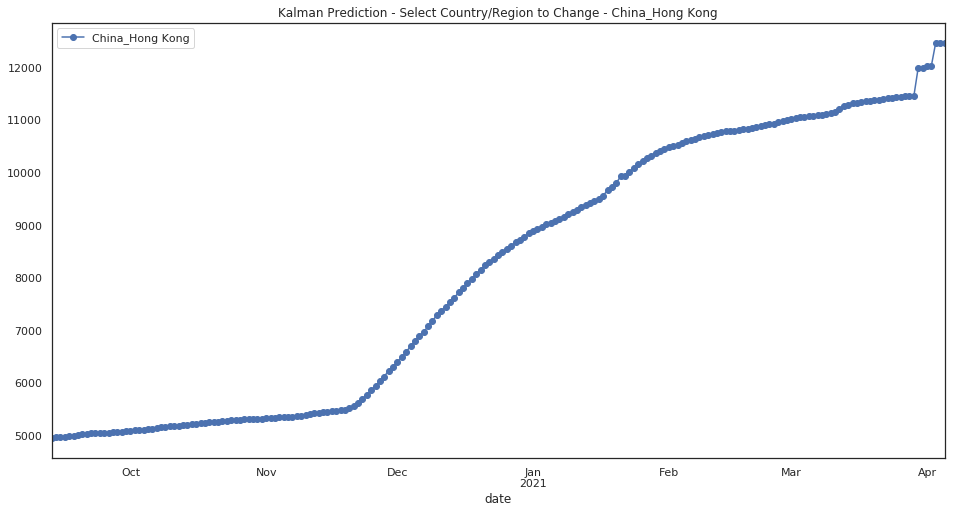

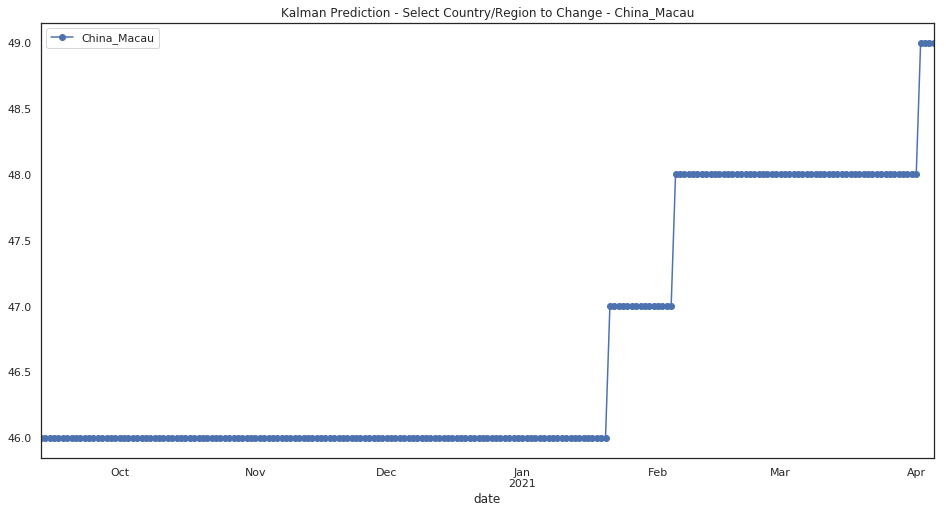

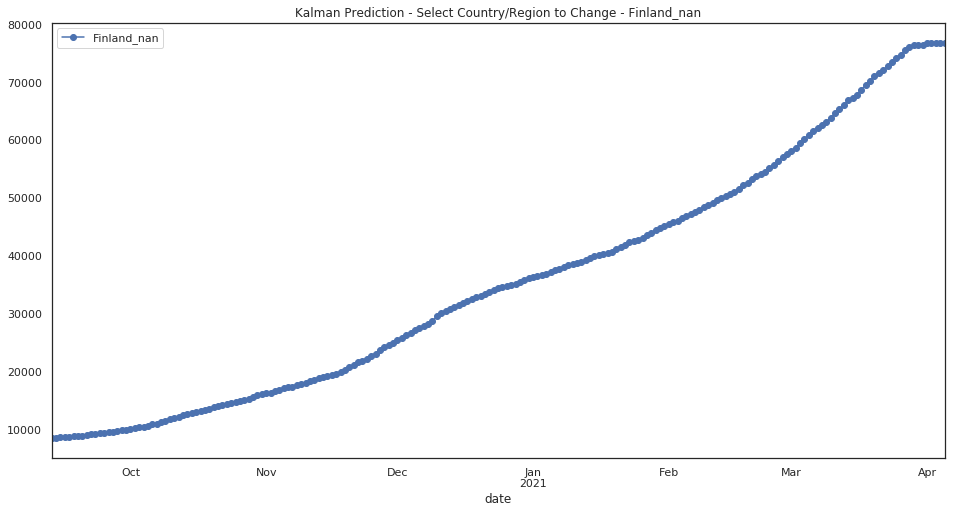

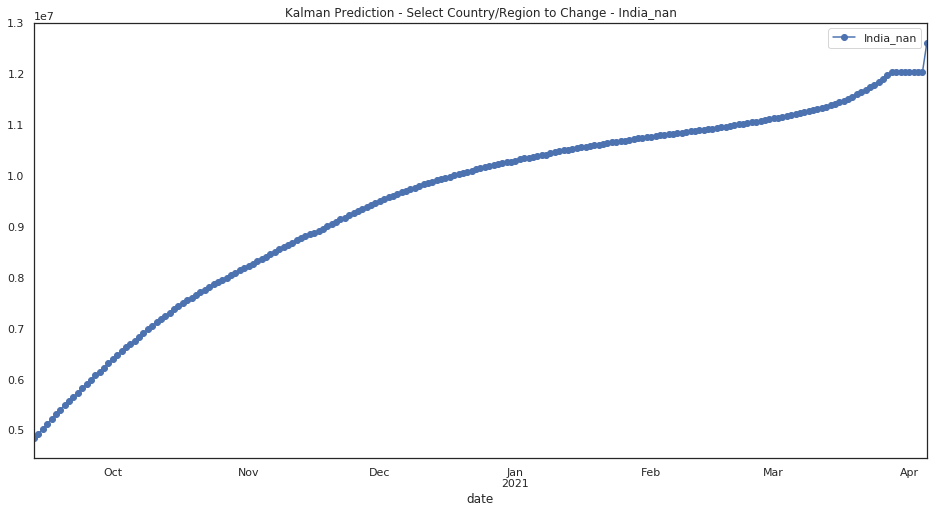

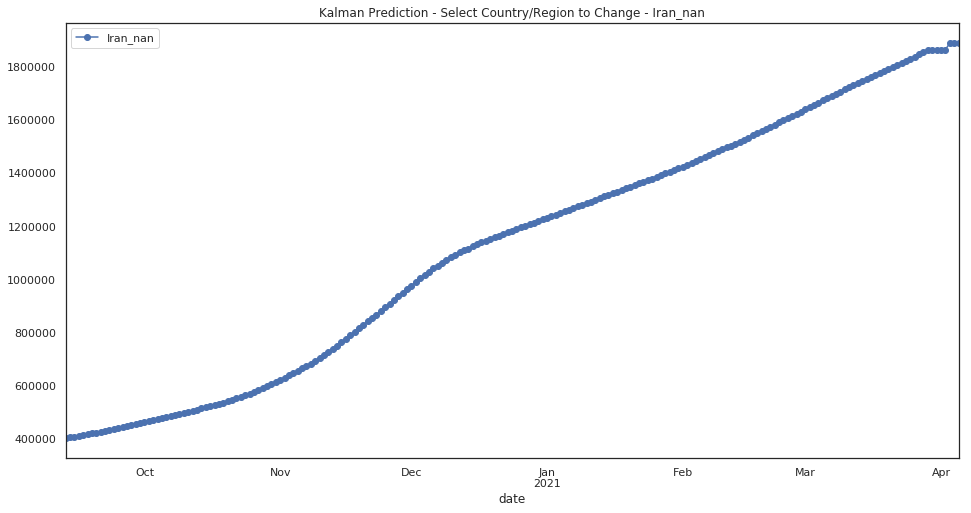

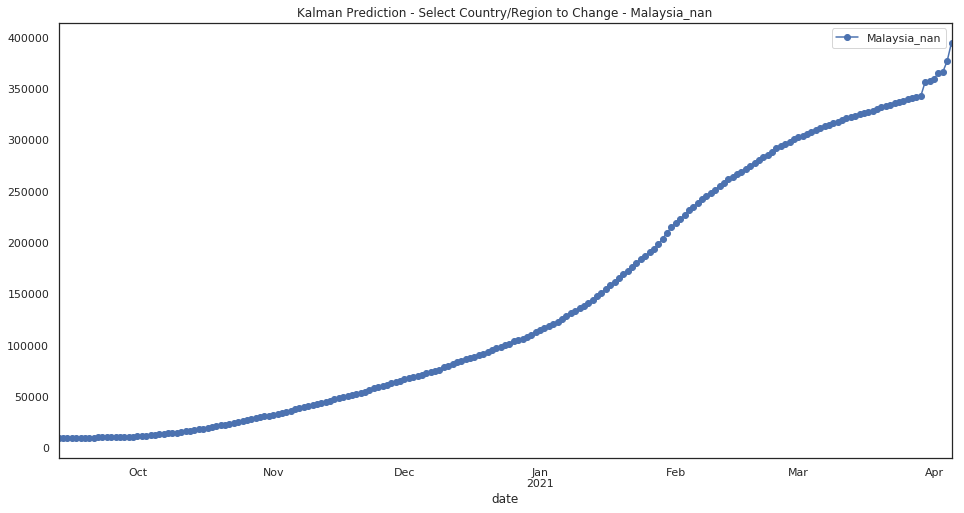

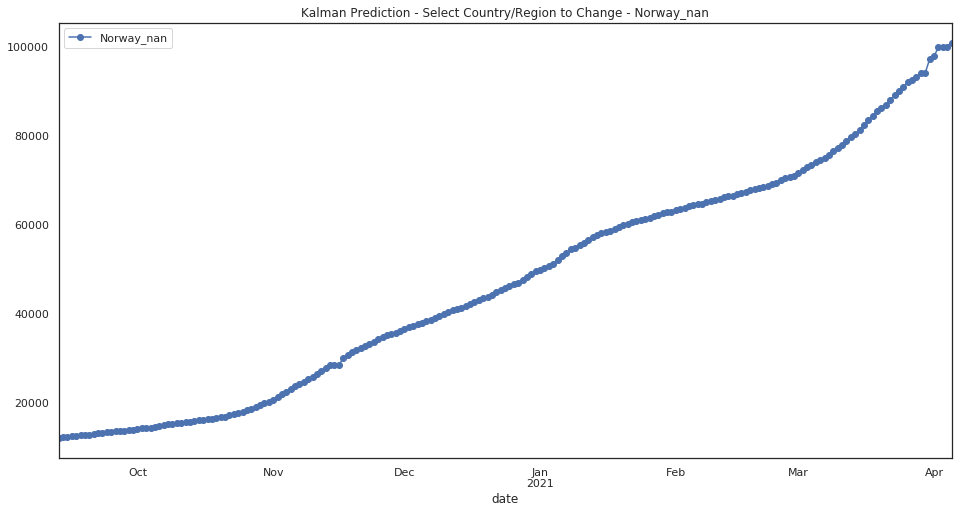

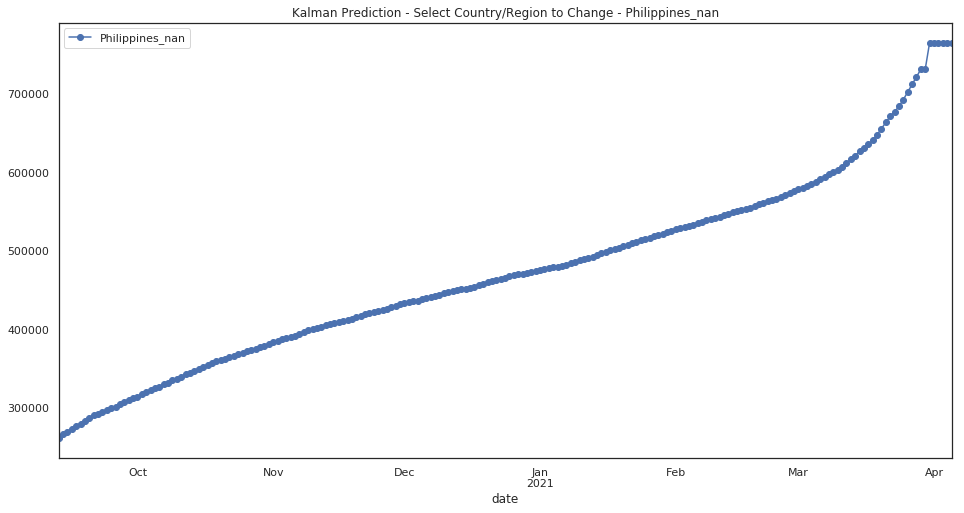

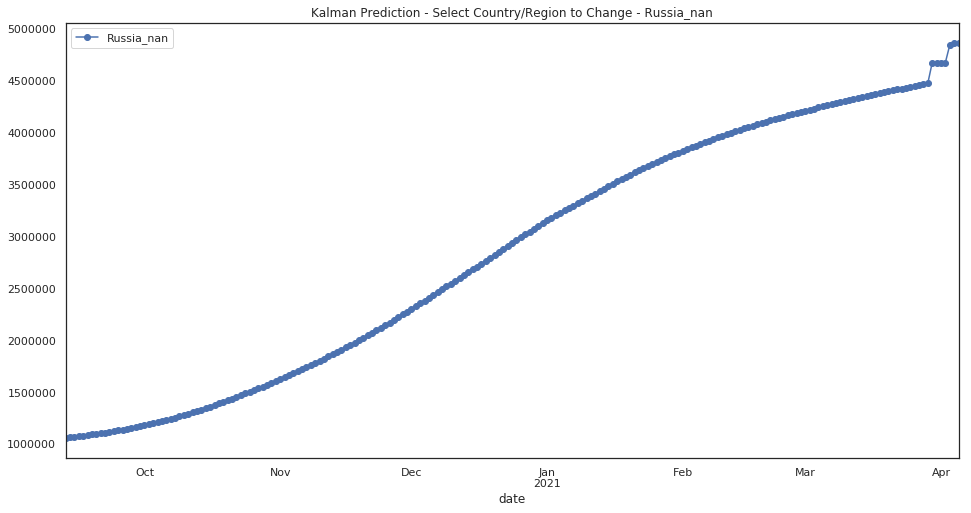

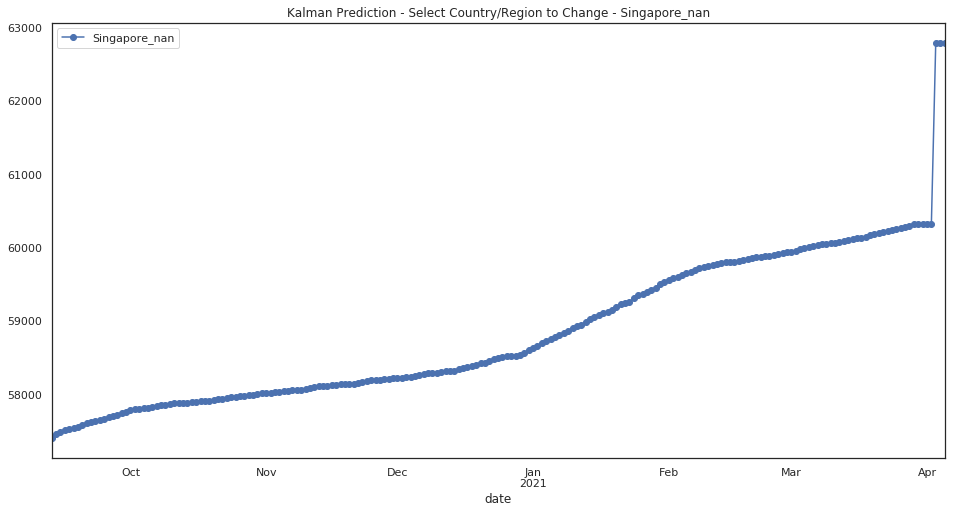

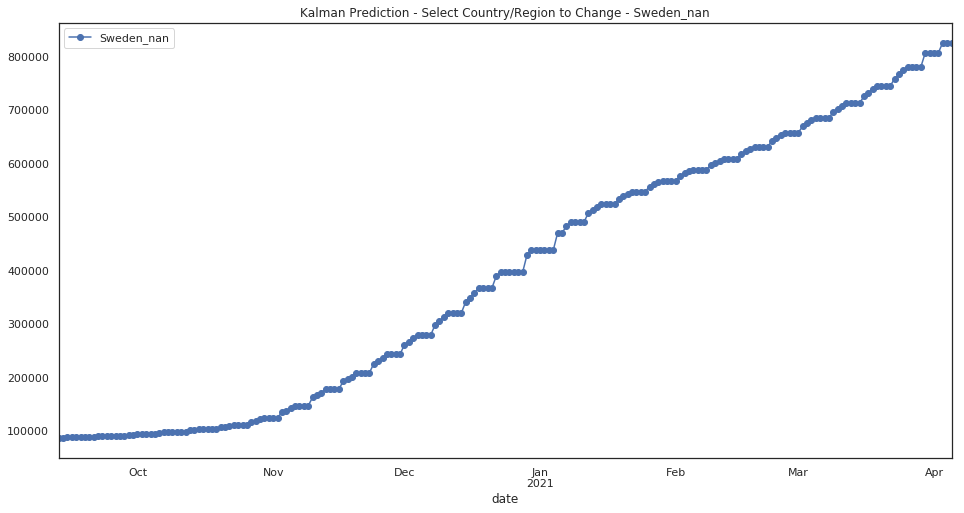

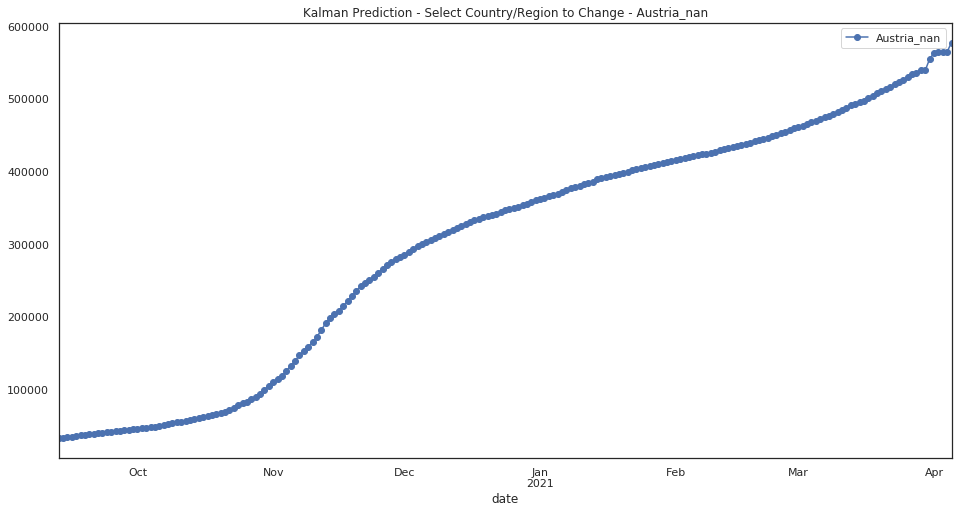

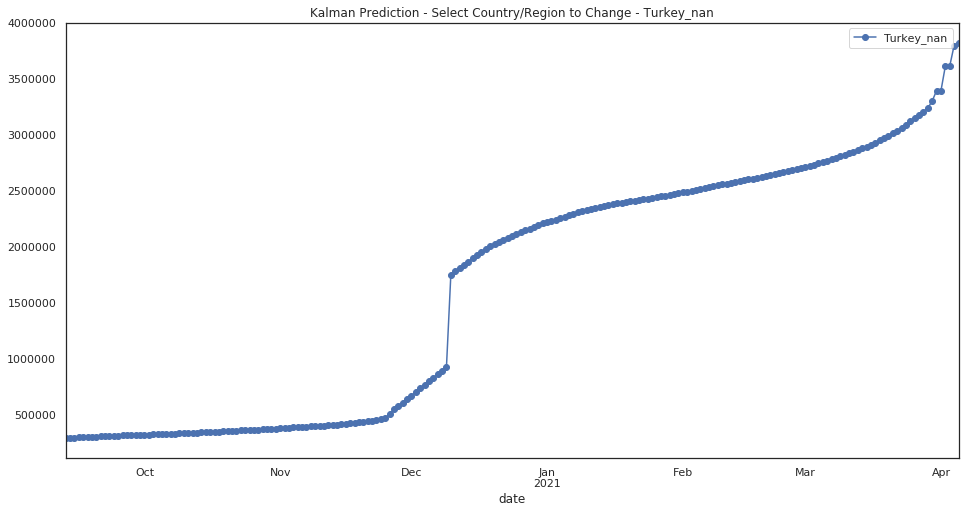

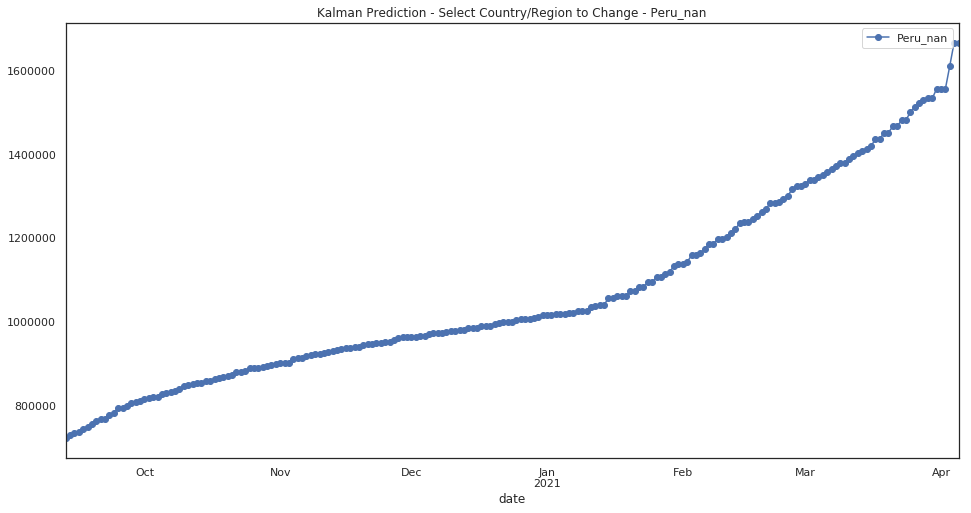

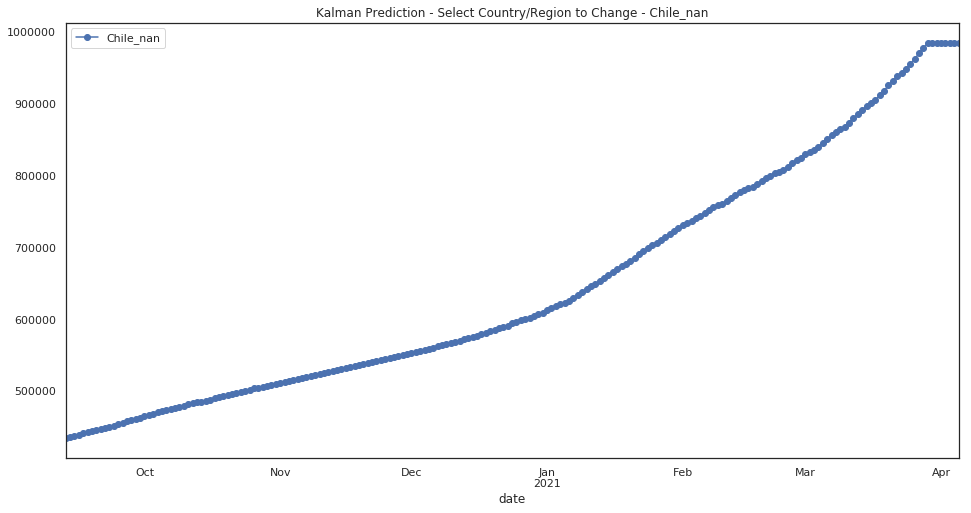

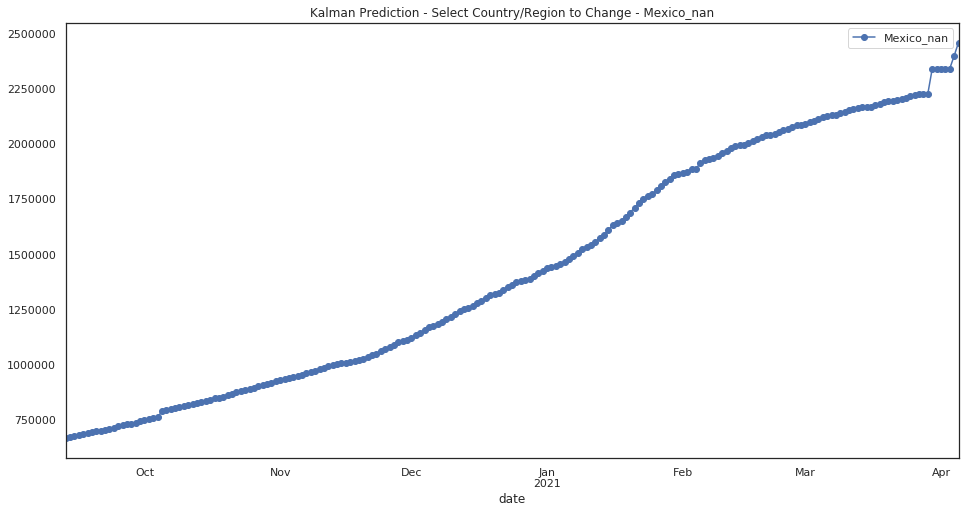

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-04-05 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      31984722.0
Brazil_nan                                          NaN      13673615.0
India_nan                                           NaN      12615446.0
France_nan                                          NaN       5144393.0
Russia_nan                                          NaN       4867111.0
United Kingdom_nan                                  NaN       4337696.0
Turkey_nan                                          NaN       3825268.0
Italy_nan                                           NaN       3567638.0
Spain_nan                                           NaN       3512493.0
Germany_nan                                         NaN       3108432.0
Argentina_nan                                       NaN       2495989.0
Colombia_nan                                        NaN       2476668.0
Mexico_nan                                          NaN       2458410.0
Poland_nan                                          NaN       2392735.0
Iran_nan                                            NaN       1891669.0
Ukraine_nan                                         NaN       1858122.0
Czechia_nan                                         NaN       1722716.0
Peru_nan                                            NaN       1666298.0
Indonesia_nan                                       NaN       1646864.0
South Africa_nan                                    NaN       1641117.0
Netherlands_nan                                     NaN       1336475.0
Chile_nan                                           NaN        984758.0
Belgium_nan                                         NaN        946233.0
Romania_nan                                         NaN        940443.0
Portugal_nan                                        NaN        918347.0
Israel_nan                                          NaN        902418.0
Iraq_nan                                            NaN        899502.0
Sweden_nan                                          NaN        825614.0
Philippines_nan                                     NaN        765738.0
Pakistan_nan                                        NaN        763871.0
...                                                 ...             ...
China_Guizhou                                       NaN           169.0
Grenada_nan                                         NaN           157.0
Australia_Australian Capital Territory              NaN           143.0
France_New Caledonia                                NaN           130.0
Australia_Northern Territory                        NaN           114.0
China_Ningxia                                       NaN            81.0
Canada_Yukon                                        NaN            75.0
Fiji_nan                                            NaN            72.0
United Kingdom_Falkland Islands (Malvinas)          NaN            56.0
Canada_Northwest Territories                        NaN            54.0
Laos_nan                                            NaN            53.0
China_Macau                                         NaN            49.0
Saint Kitts and Nevis_nan                           NaN            47.0
Denmark_Greenland                                   NaN            34.0
Holy See_nan                                        NaN            30.0
France_Saint Pierre and Miquelon                    NaN            24.0
United Kingdom_Anguilla                             NaN            23.0
United Kingdom_Montserrat                           NaN            20.0
Solomon Islands_nan                                 NaN            19.0
China_Qinghai                                       NaN            18.0
Canada_Repatriated Travellers                       NaN            15.0
Canada_Grand Princess                               NaN            13.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          54896.0      31319.0      63114.0      22695.0   
2020-09-14          54944.0      31463.0      63323.0      22776.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39228.0      12517.0      50132.0       1986.0   
2020-09-22          39266.0      12672.0      50325.0       1681.0   
2020-09-23          39313.0      12819.0      50513.0       2102.0   
2020-09-24          39330.0      12960.0      50695.0       1753.0   
2020-09-25          39350.0      13065.0      50872.0       2126.0   
2020-09-26          39358.0      13189.0      51035.0       1836.0   
2020-09-27          39387.0      13317.0      51190.0       2141.0   
2020-09-28          39405.0      13445.0      51338.0       2253.0   
2020-09-29          39423.0      13541.0      51492.0       1966.0   
2020-09-30          39438.0      13683.0      51655.0       2383.0   
2020-10-01          39455.0      13837.0      51817.0       2050.0   
2020-10-02          39462.0      13968.0      51977.0       2391.0   
2020-10-03          39470.0      14125.0      52128.0       2110.0   
2020-10-04          39508.0      14288.0      52269.0       2364.0   
2020-10-05          39581.0      14435.0      52403.0       2588.0   
2020-10-06          39646.0      14596.0      52532.0       2370.0   
2020-10-07          39713.0      14742.0      52654.0       2989.0   
2020-10-08          39779.0      14908.0      52790.0       2568.0   
2020-10-09          39850.0      15073.0      52937.0       3063.0   
2020-10-10          39866.0      15244.0      53077.0       2696.0   
2020-10-11          39953.0      15416.0      53211.0       3021.0   
2020-10-12          40017.0      15584.0      53447.0       3279.0   
...                     ...          ...          ...          ...   
2021-03-08          56045.0     113604.0     114521.0      11042.0   
2021-03-09          56048.0     114204.0     114683.0      11069.0   
2021-03-10          56062.0     114828.0     114829.0      11089.0   
2021-03-11          56086.0     115437.0     114990.0      11130.0   
2021-03-12          56124.0     116109.0     115159.0      11185.0   
2021-03-13          56135.0     116836.0     115295.0      11199.0   
2021-03-14          56154.0     117509.0     115414.0      11228.0   
2021-03-15          56158.0     118069.0     115550.0      11266.0   
2021-03-16          56164.0     118524.0     115688.0      11289.0   
2021-03-17          56184.0     118952.0     115831.0      11319.0   
2021-03-18          56211.0     119512.0     115990.0      11360.0   
2021-03-19          56239.0     120063.0     116125.0      11393.0   
2021-03-20          56265.0     120565.0     116220.0      11431.0   
2021-03-21          56276.0     121228.0     116302.0      11481.0   
2021-03-22          56319.0     121658.0     116396.0      11517.0   
2021-03-23          56348.0     121883.0     116494.0      11545.0   
2021-03-24          56362.0     122297.0     116584.0      11591.0   
2021-03-25          56393.0     122792.0     116690.0      11638.0   
2021-03-26          56422.0     123267.0     116810.0      11687.0   
2021-03-27          56456.0     123701.0     116911.0      11732.0   
2021-03-28          56466.0     124182.0     116992.0      11809.0   
2021-03-29          56487.0     124527.0     117096.0      11850.0   
2021-03-30          56494.0     126407.0     117117.0      11936.0   
2021-03-31          56491.0     127244.0     117088.0      12023.0   
2021-04-01

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'France_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Turkey_nan',
 'Italy_nan',
 'Spain_nan',
 'Germany_nan',
 'Argentina_nan',
 'Colombia_nan',
 'Mexico_nan',
 'Poland_nan',
 'Iran_nan',
 'Ukraine_nan',
 'Czechia_nan',
 'Peru_nan',
 'Indonesia_nan',
 'South Africa_nan',
 'Netherlands_nan',
 'Chile_nan',
 'Belgium_nan',
 'Romania_nan',
 'Portugal_nan',
 'Israel_nan',
 'Iraq_nan',
 'Sweden_nan',
 'Philippines_nan',
 'Pakistan_nan',
 'Jordan_nan',
 'Hungary_nan',
 'Serbia_nan',
 'Switzerland_nan',
 'Bangladesh_nan',
 'Austria_nan',
 'Morocco_nan',
 'United Arab Emirates_nan',
 'Lebanon_nan',
 'Japan_nan',
 'Saudi Arabia_nan',
 'Malaysia_nan',
 'Bulgaria_nan',
 'Canada_Ontario',
 'Panama_nan',
 'Slovakia_nan',
 'Ecuador_nan',
 'Belarus_nan',
 'Kazakhstan_nan',
 'Canada_Quebec',
 'Bolivia_nan',
 'Georgia_nan',
 'Greece_nan',
 'Nepal_nan',
 'Croatia_nan',
 'Dominican Republic_nan',
 'Azerbaijan_nan',
 'Tunisia_nan',
 'Ireland_nan',
 'West

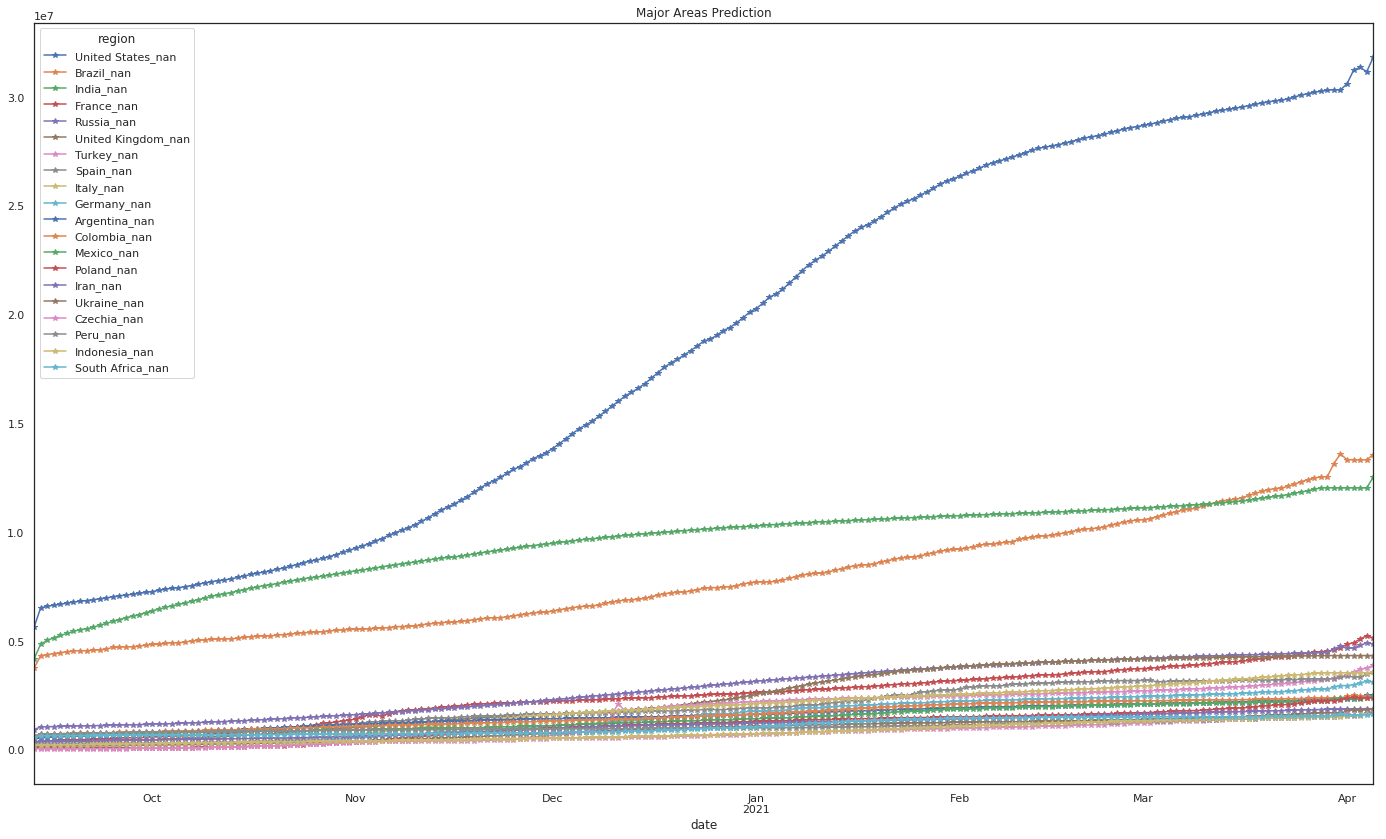

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

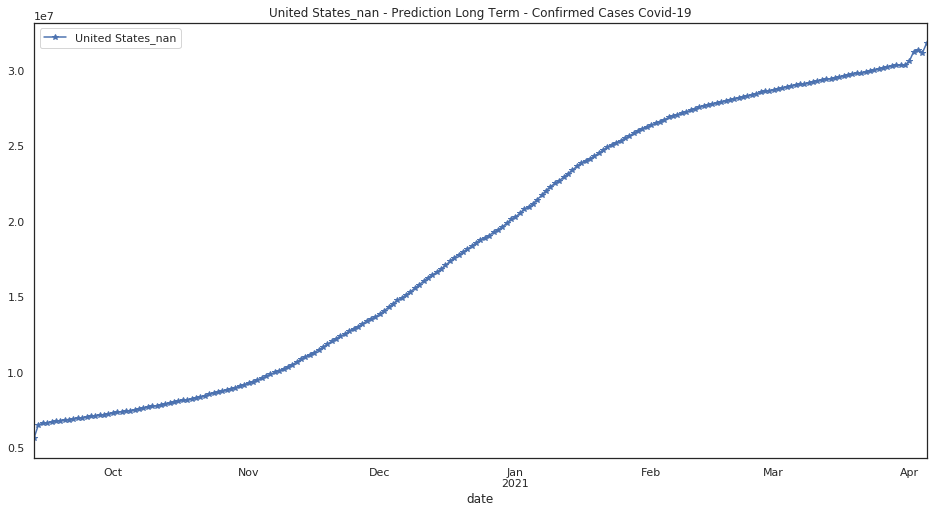

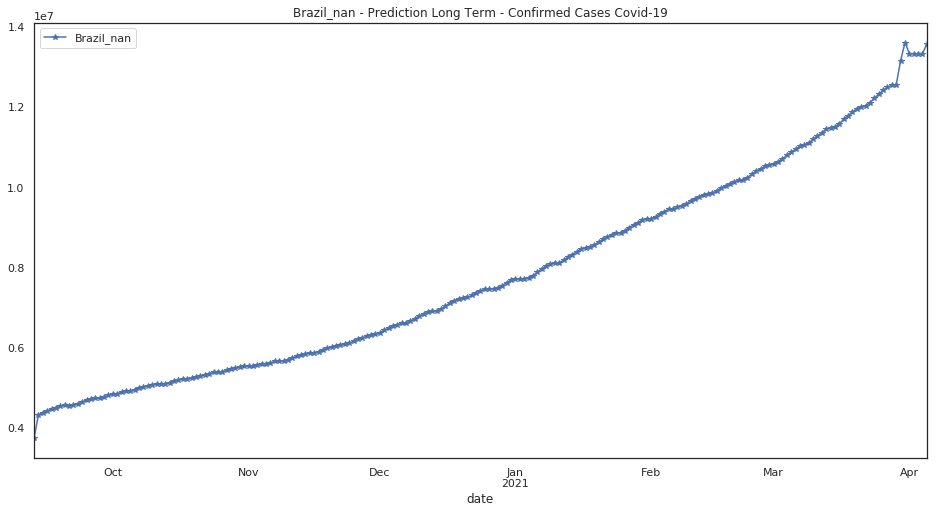

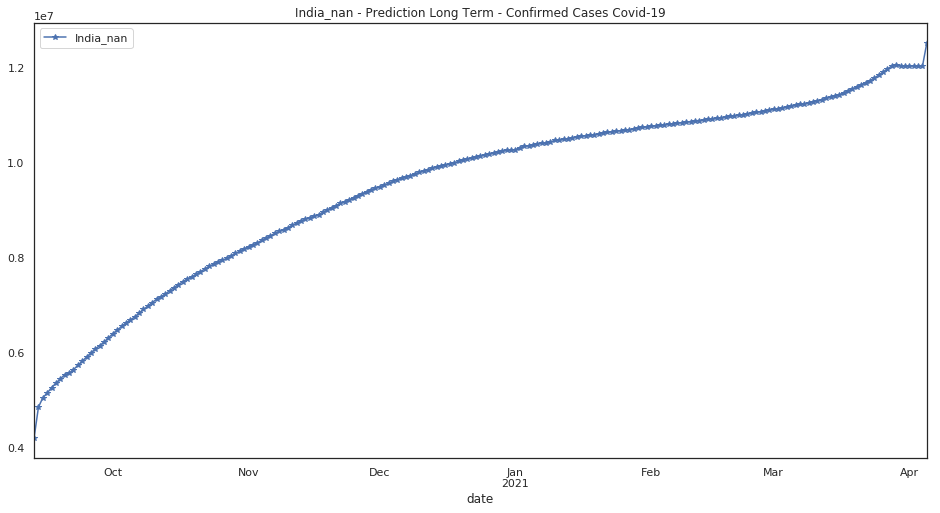

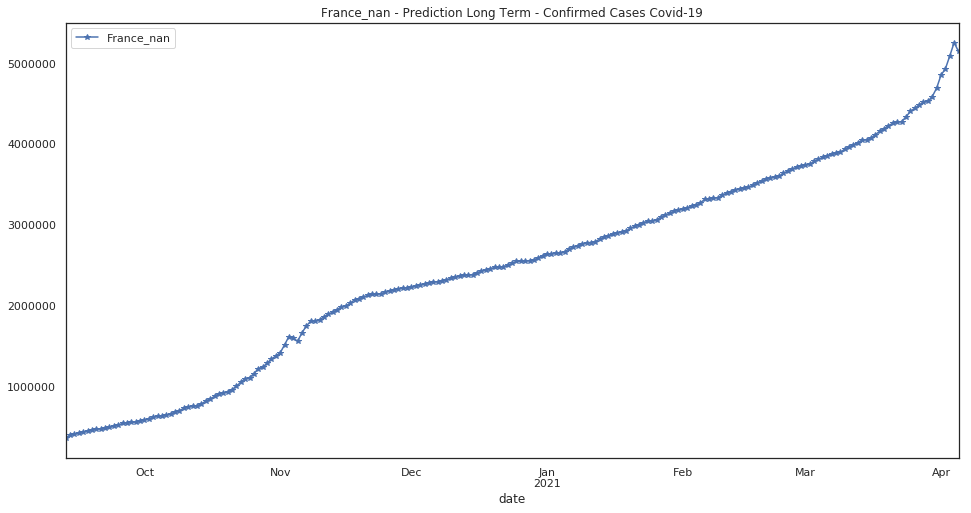

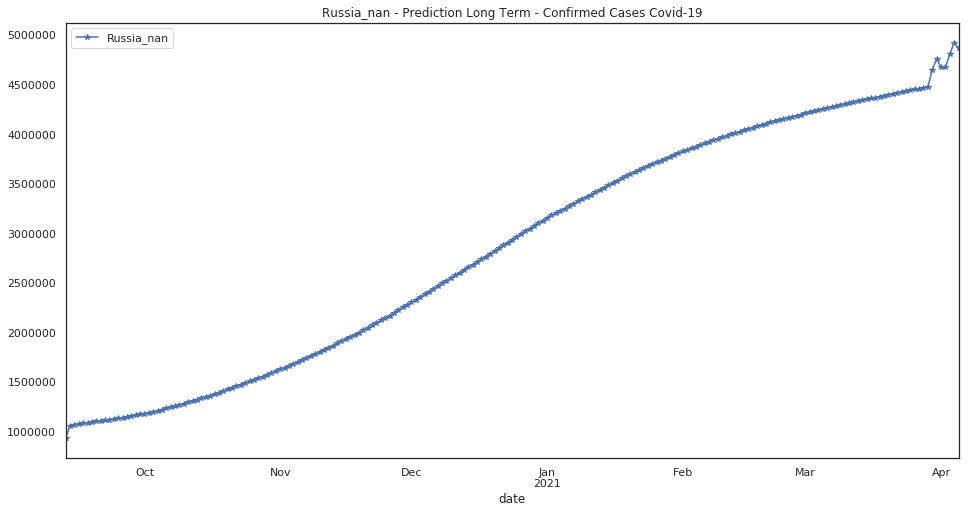

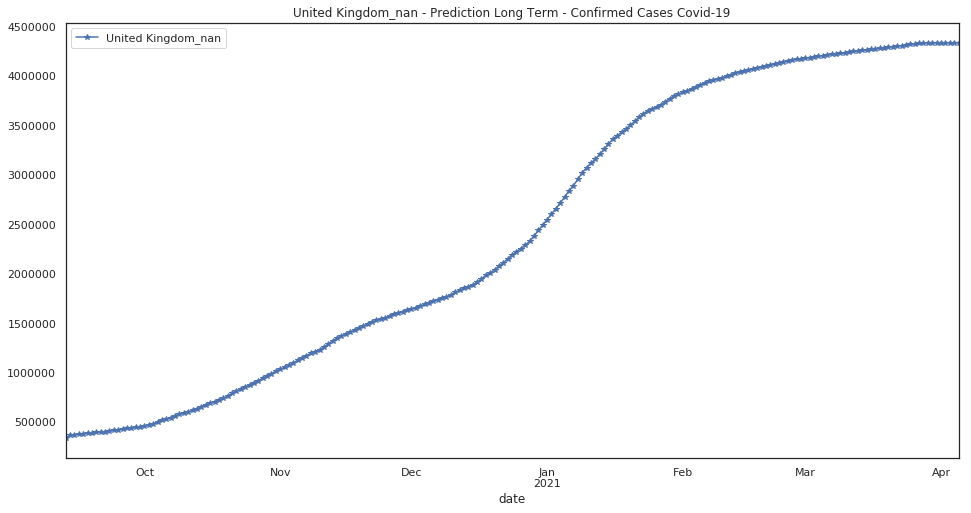

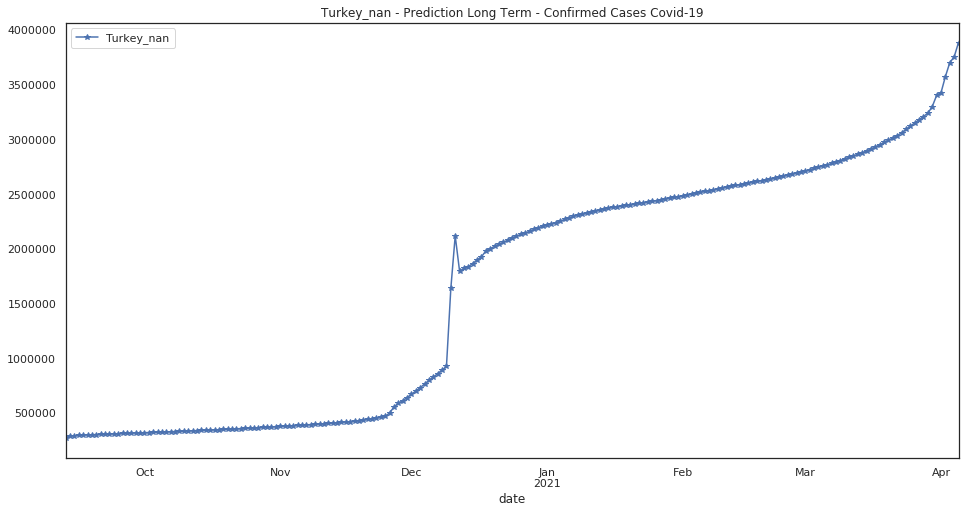

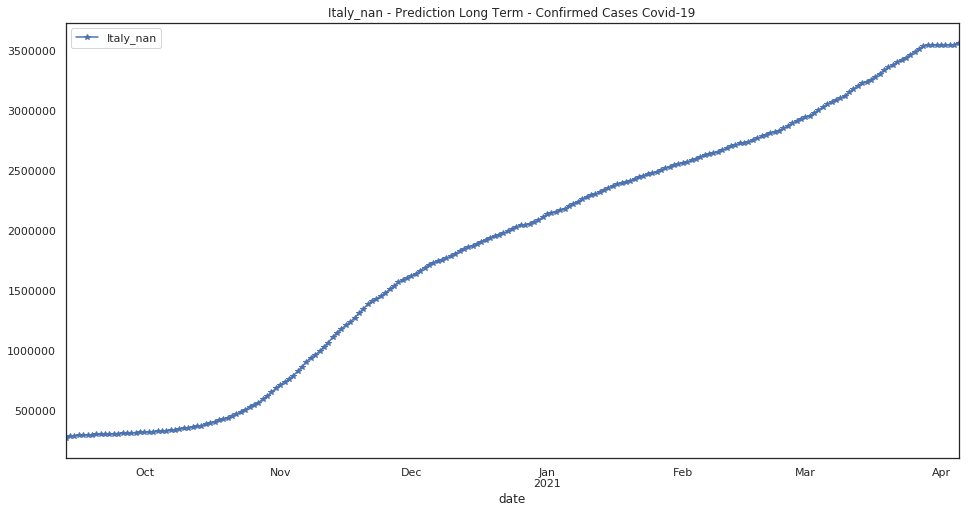

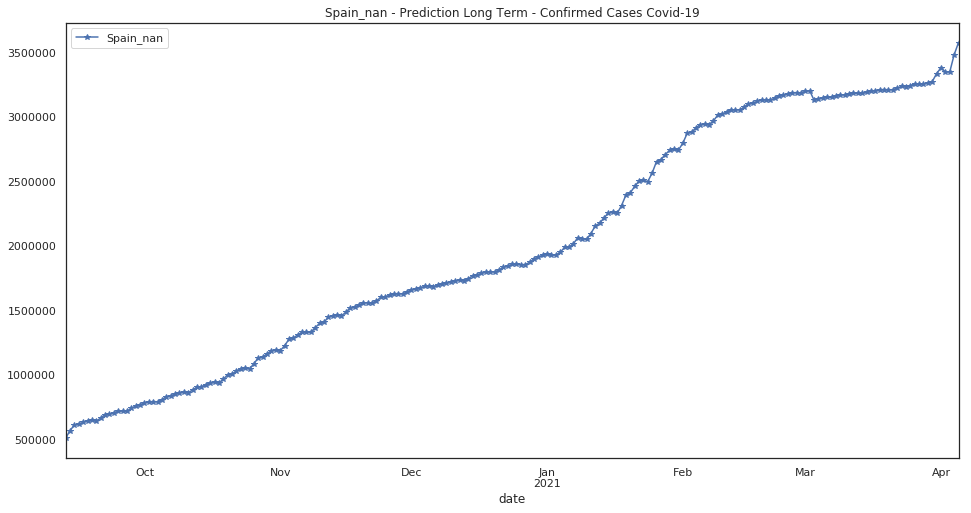

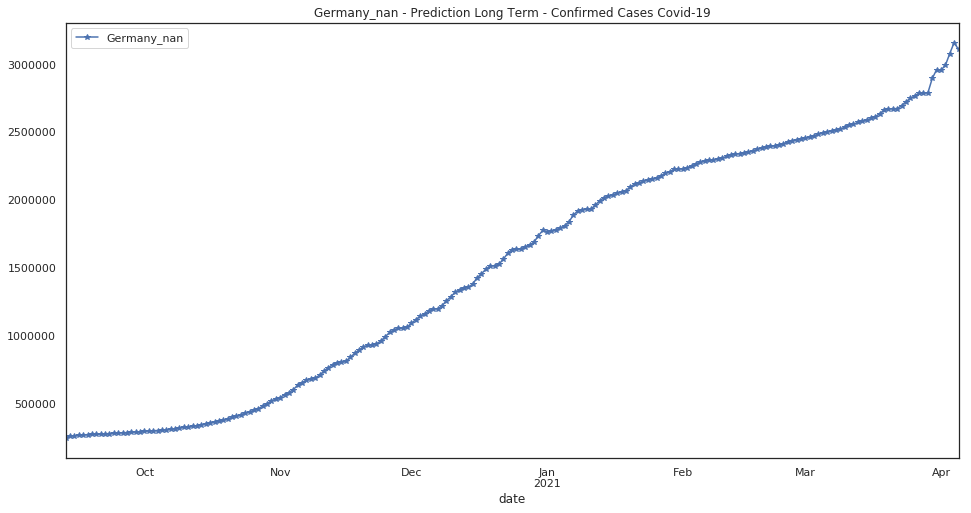

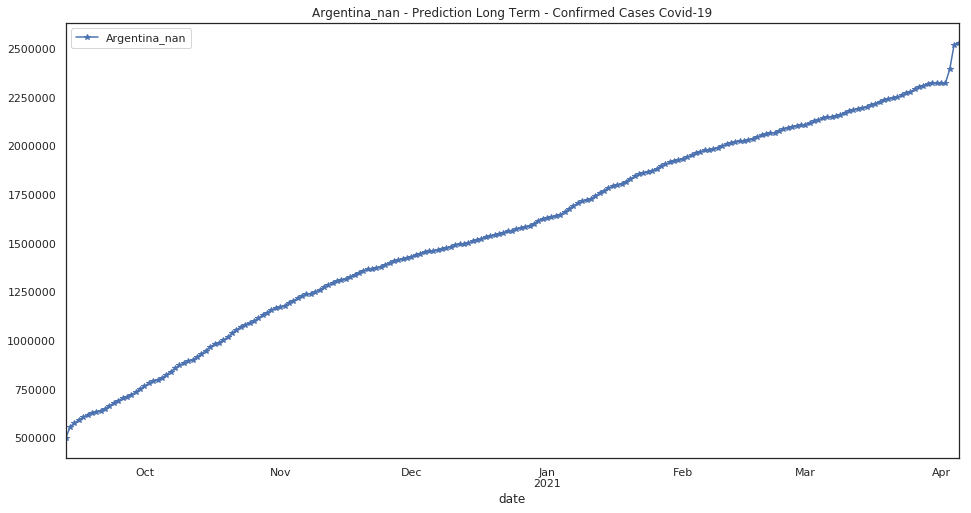

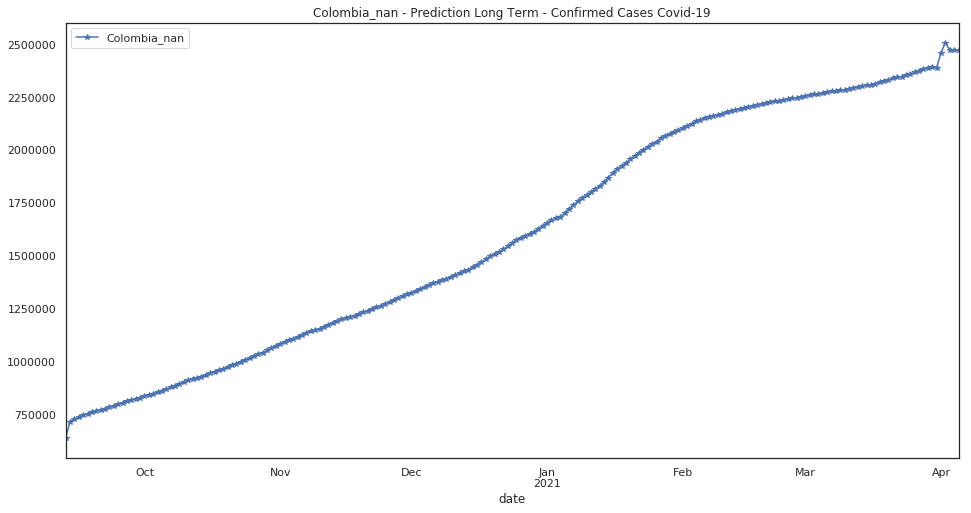

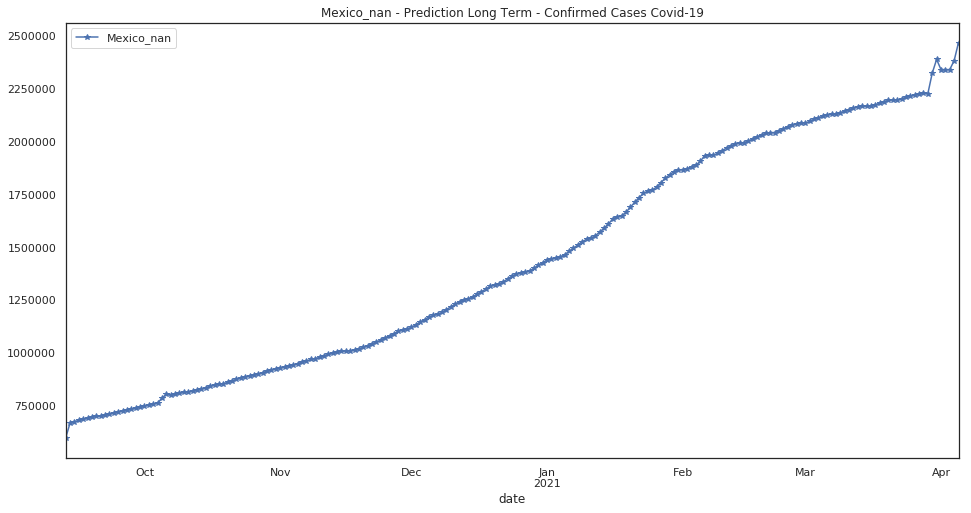

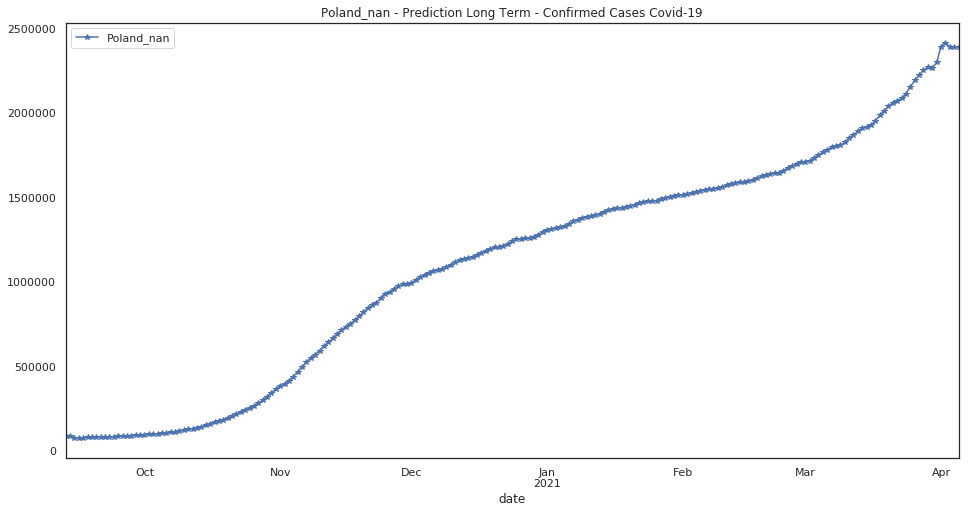

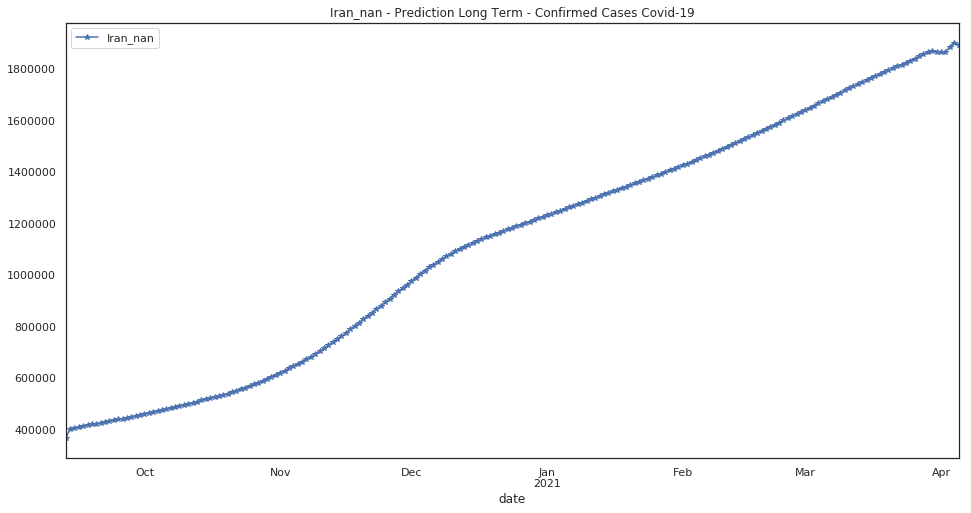

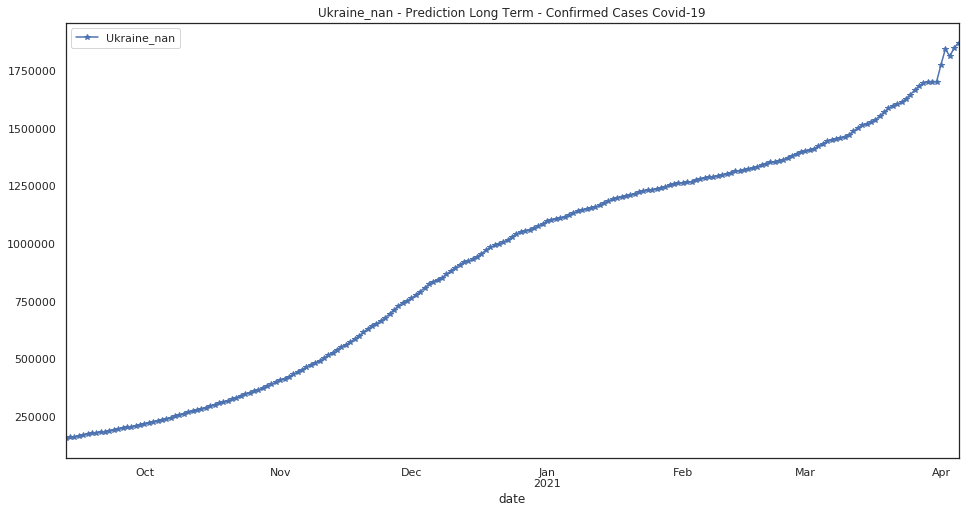

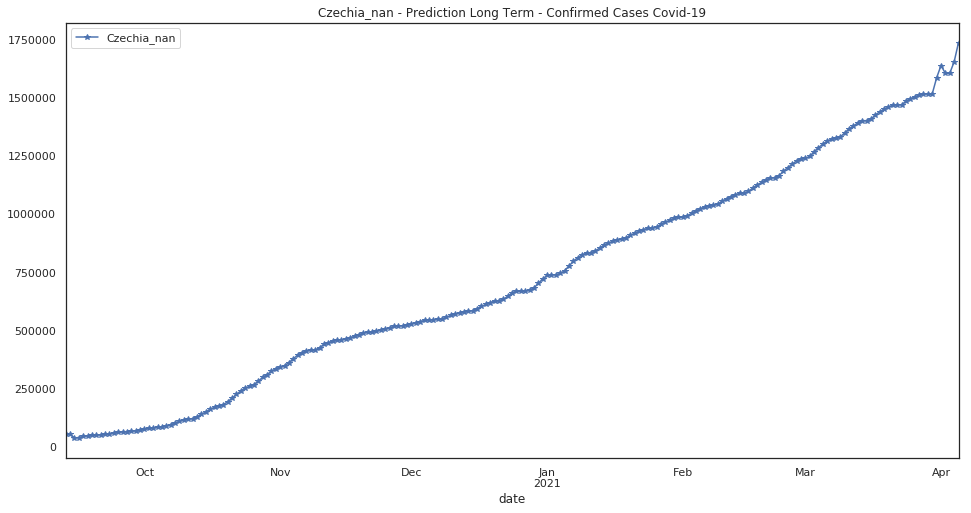

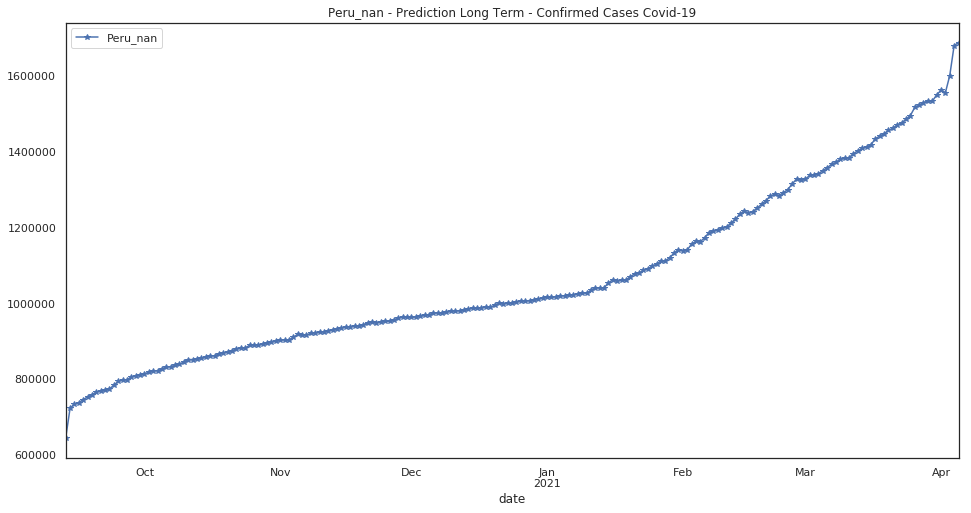

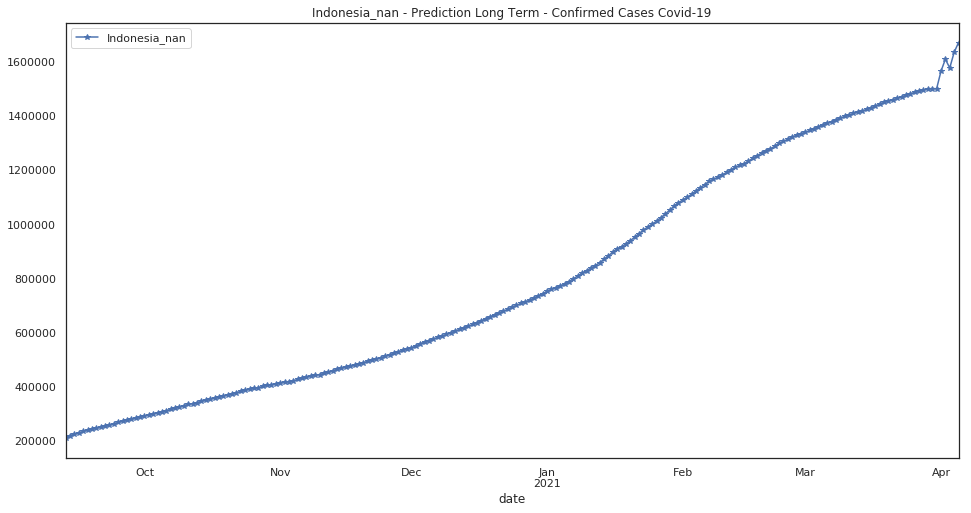

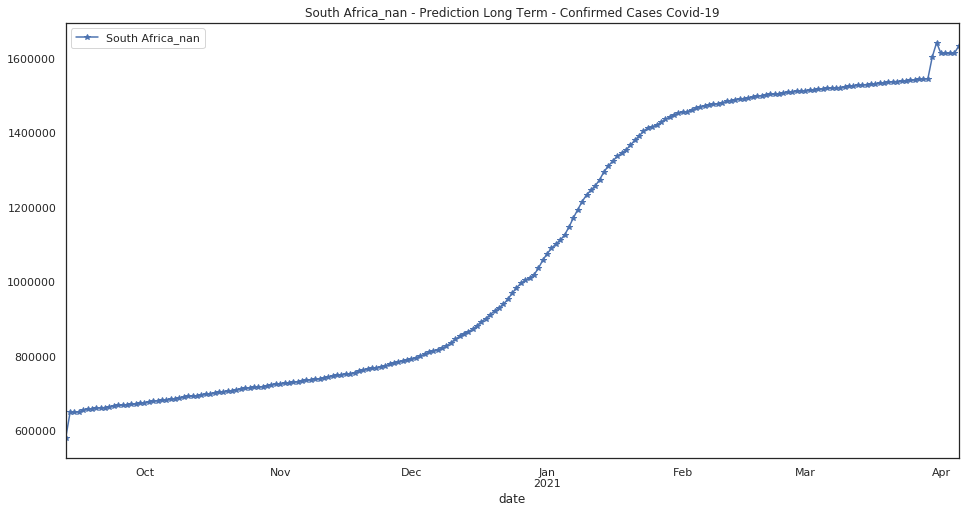

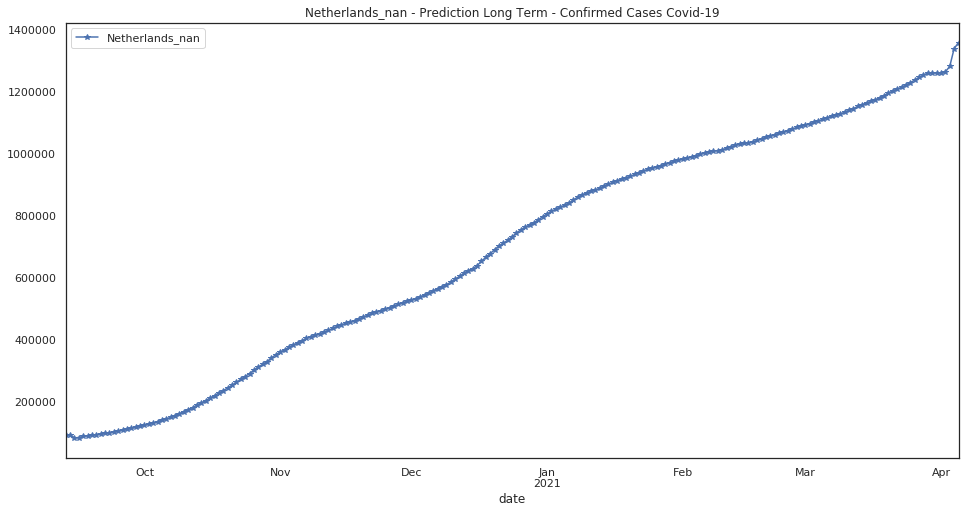

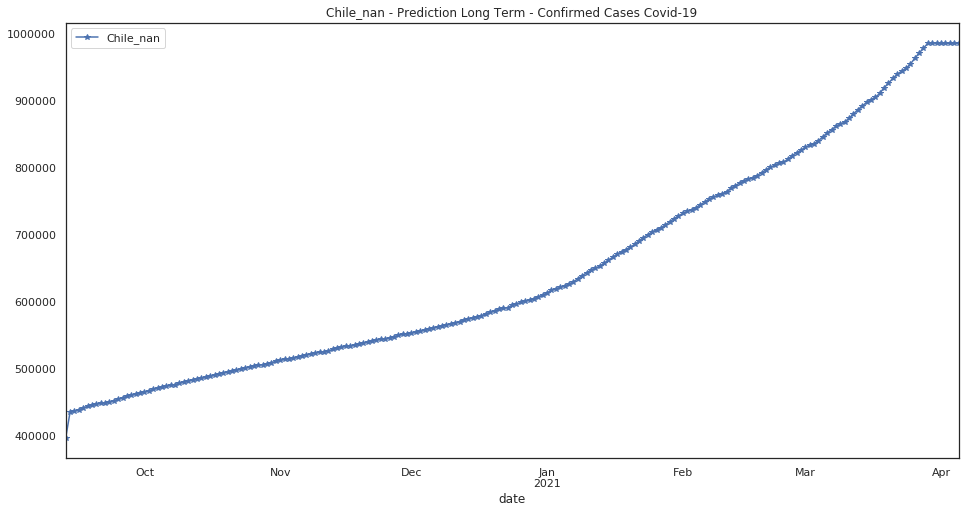

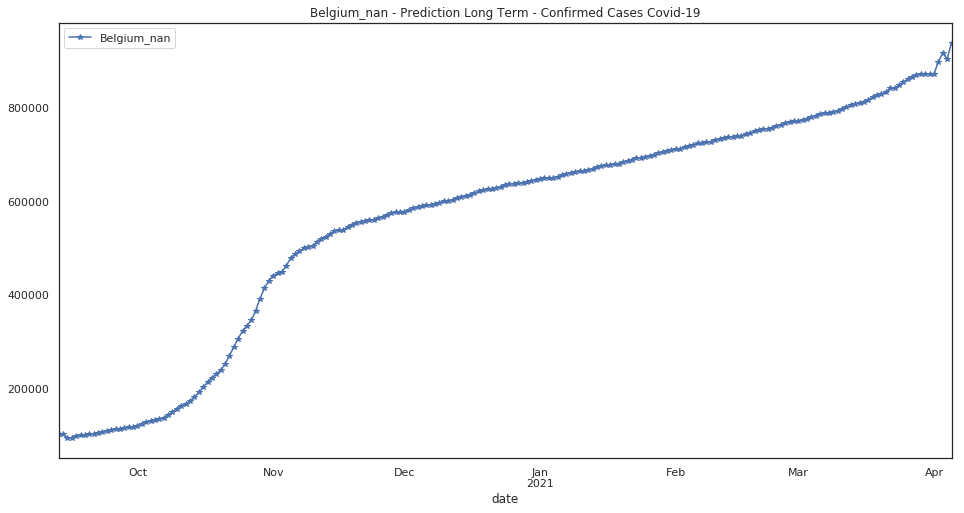

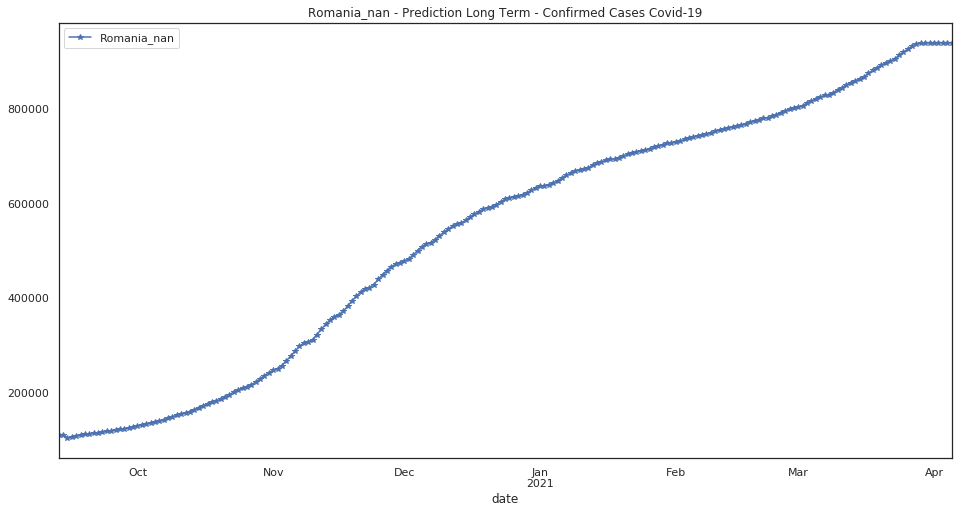

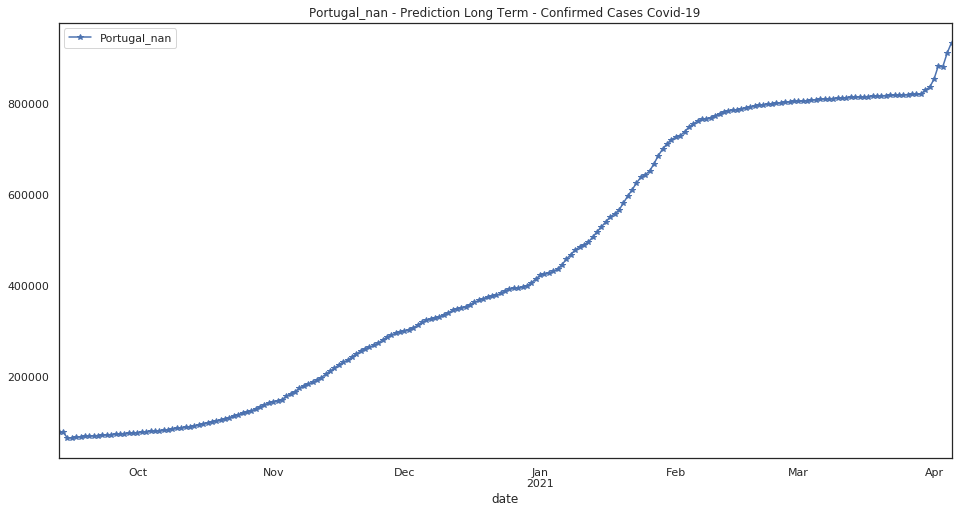

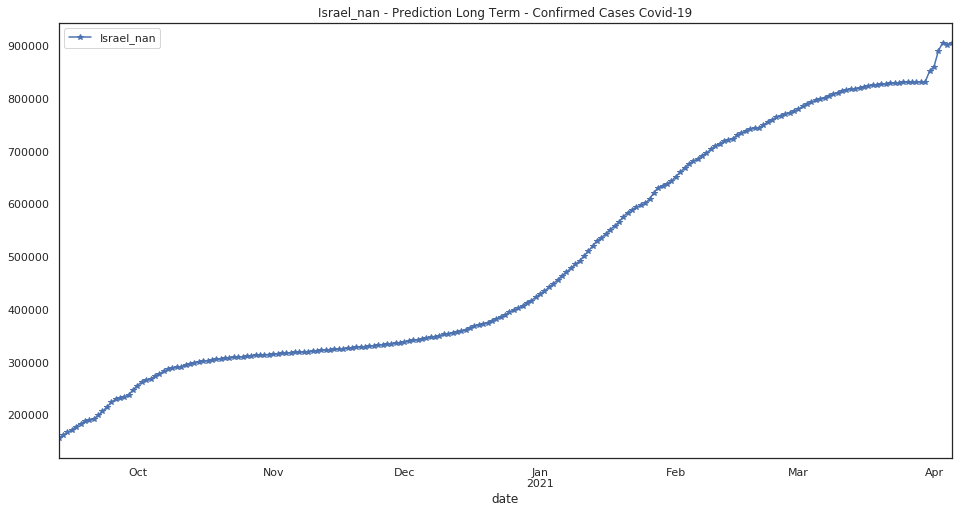

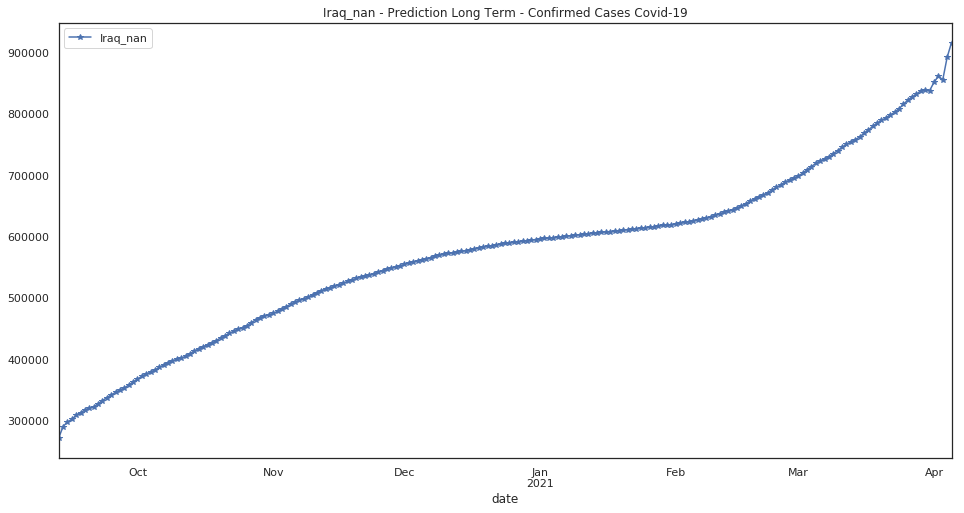

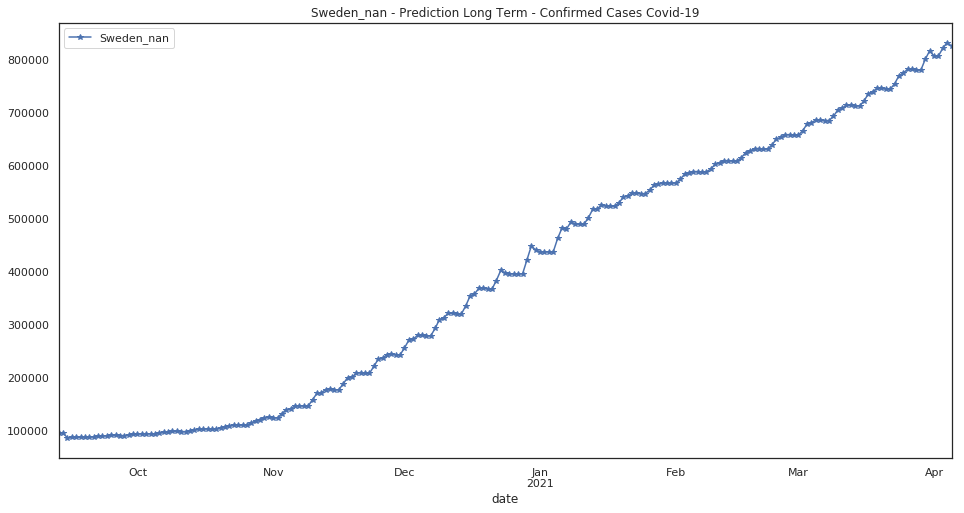

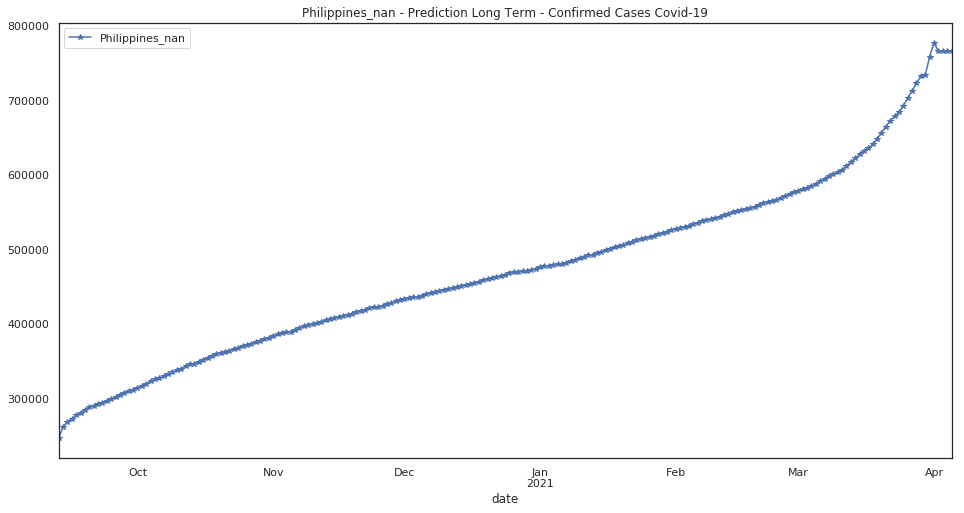

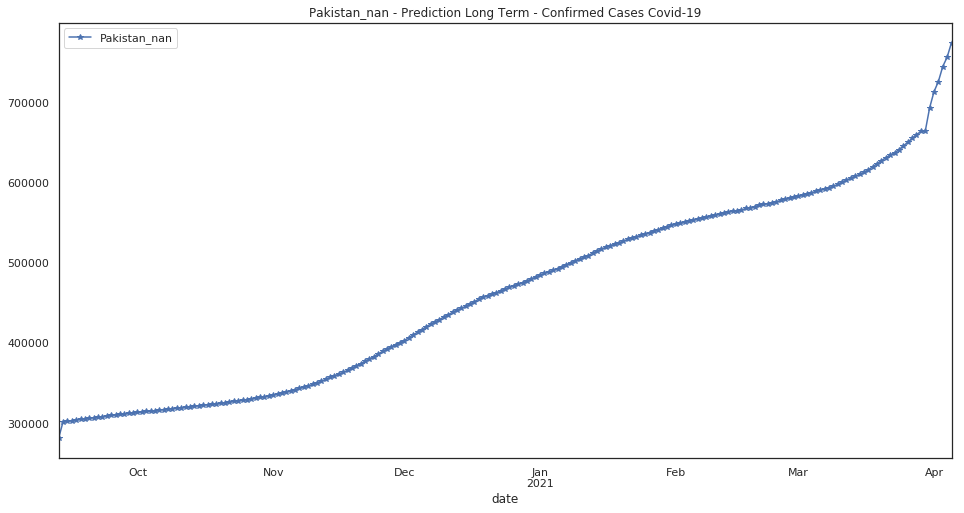

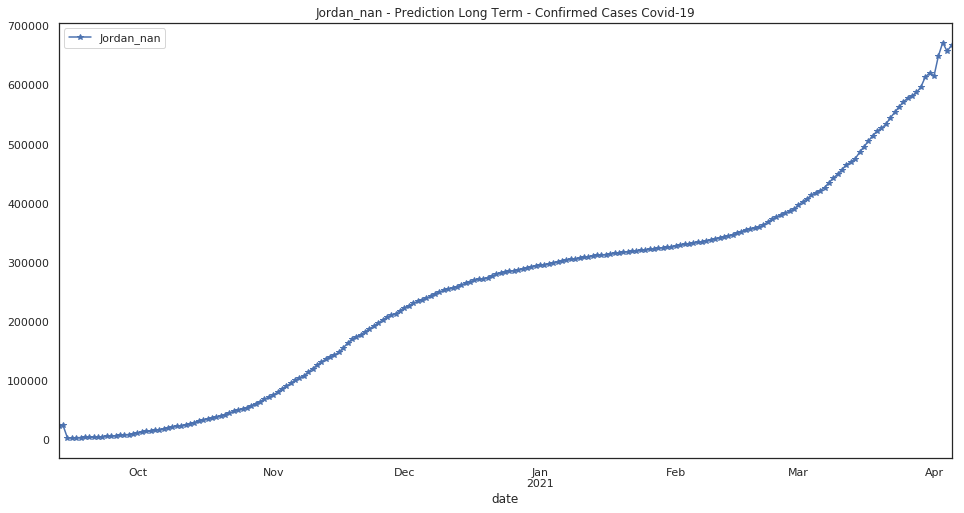

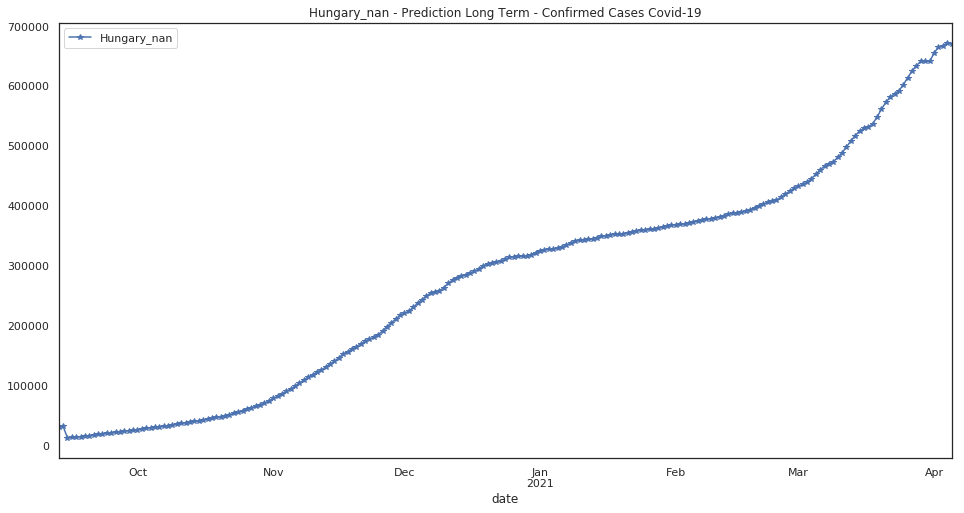

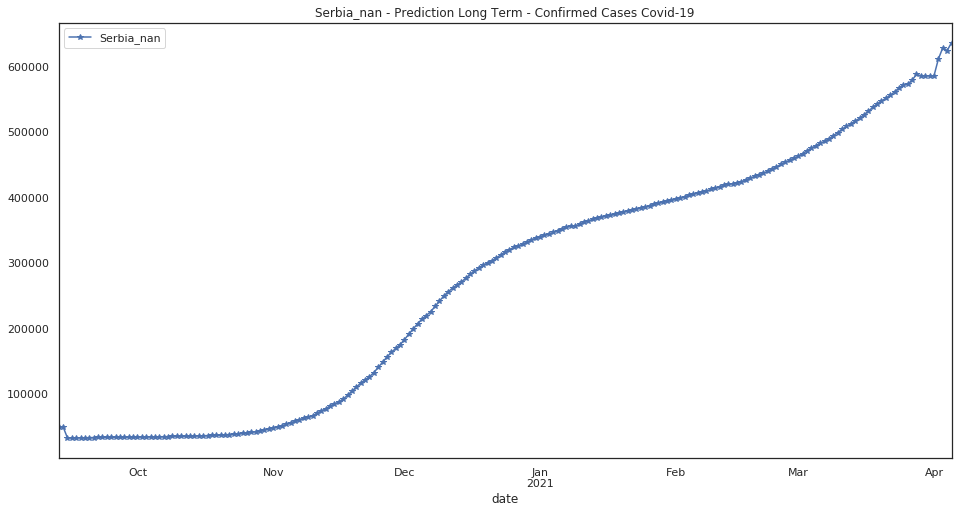

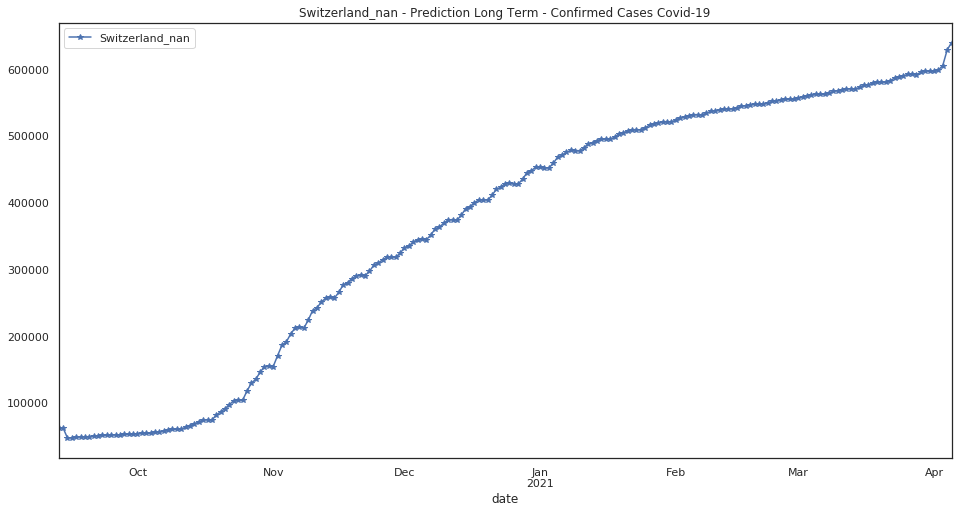

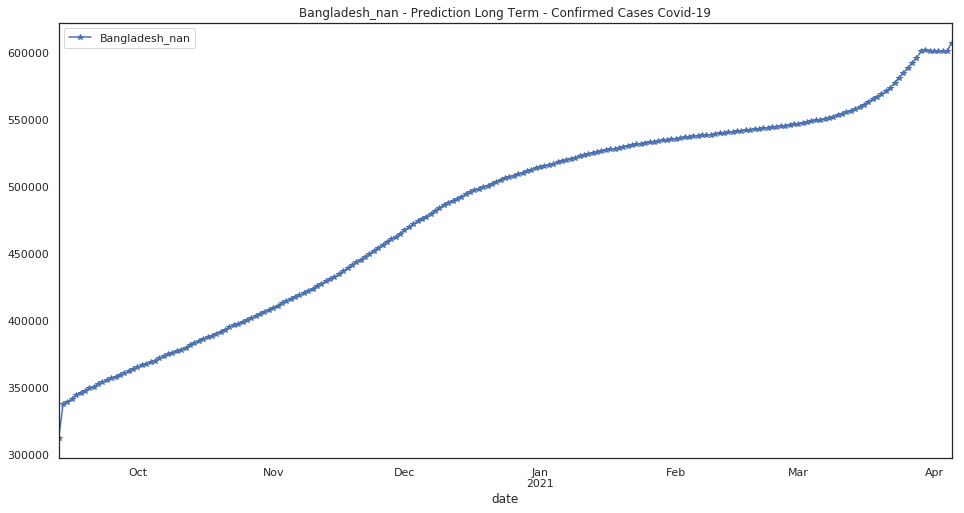

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

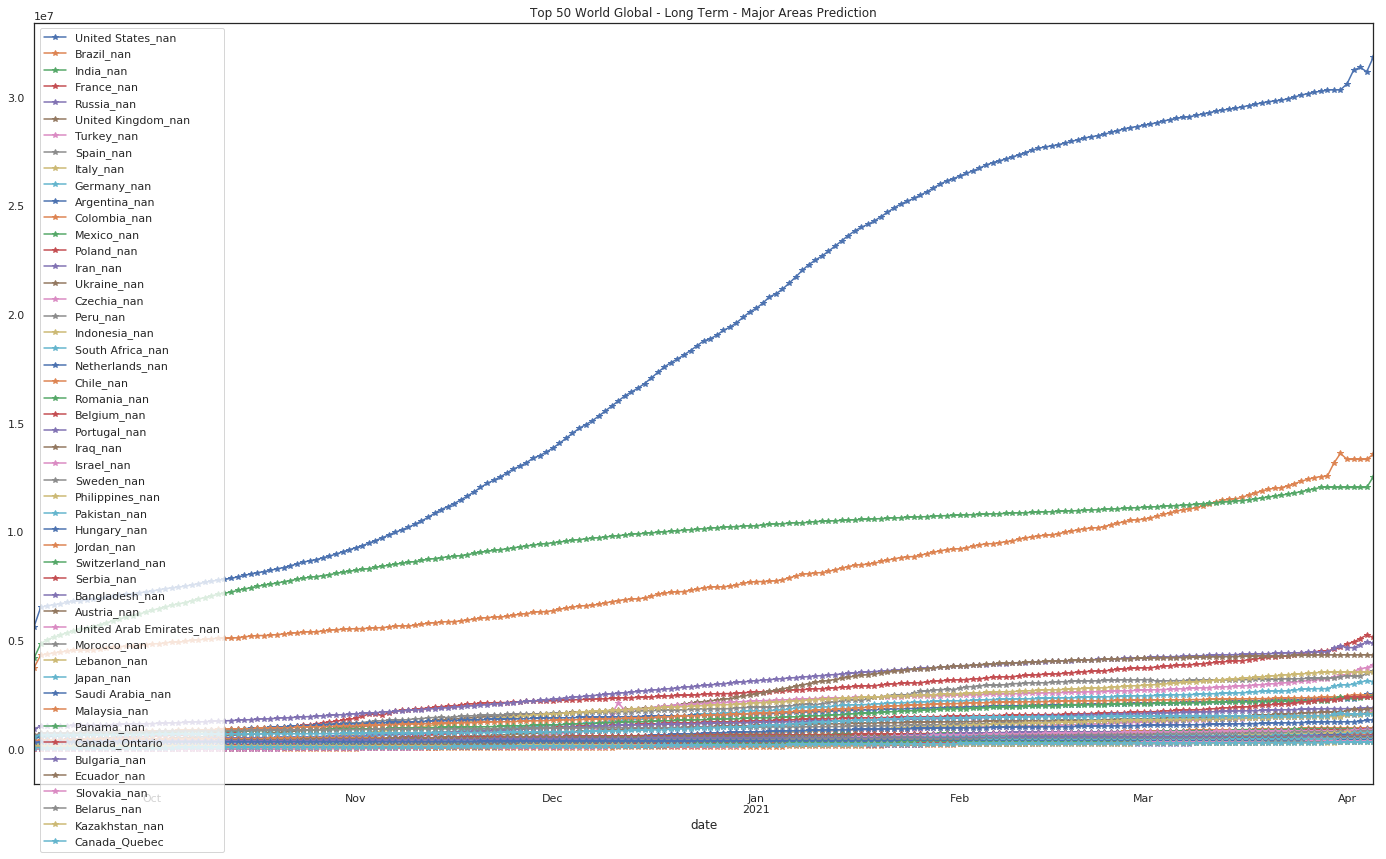

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

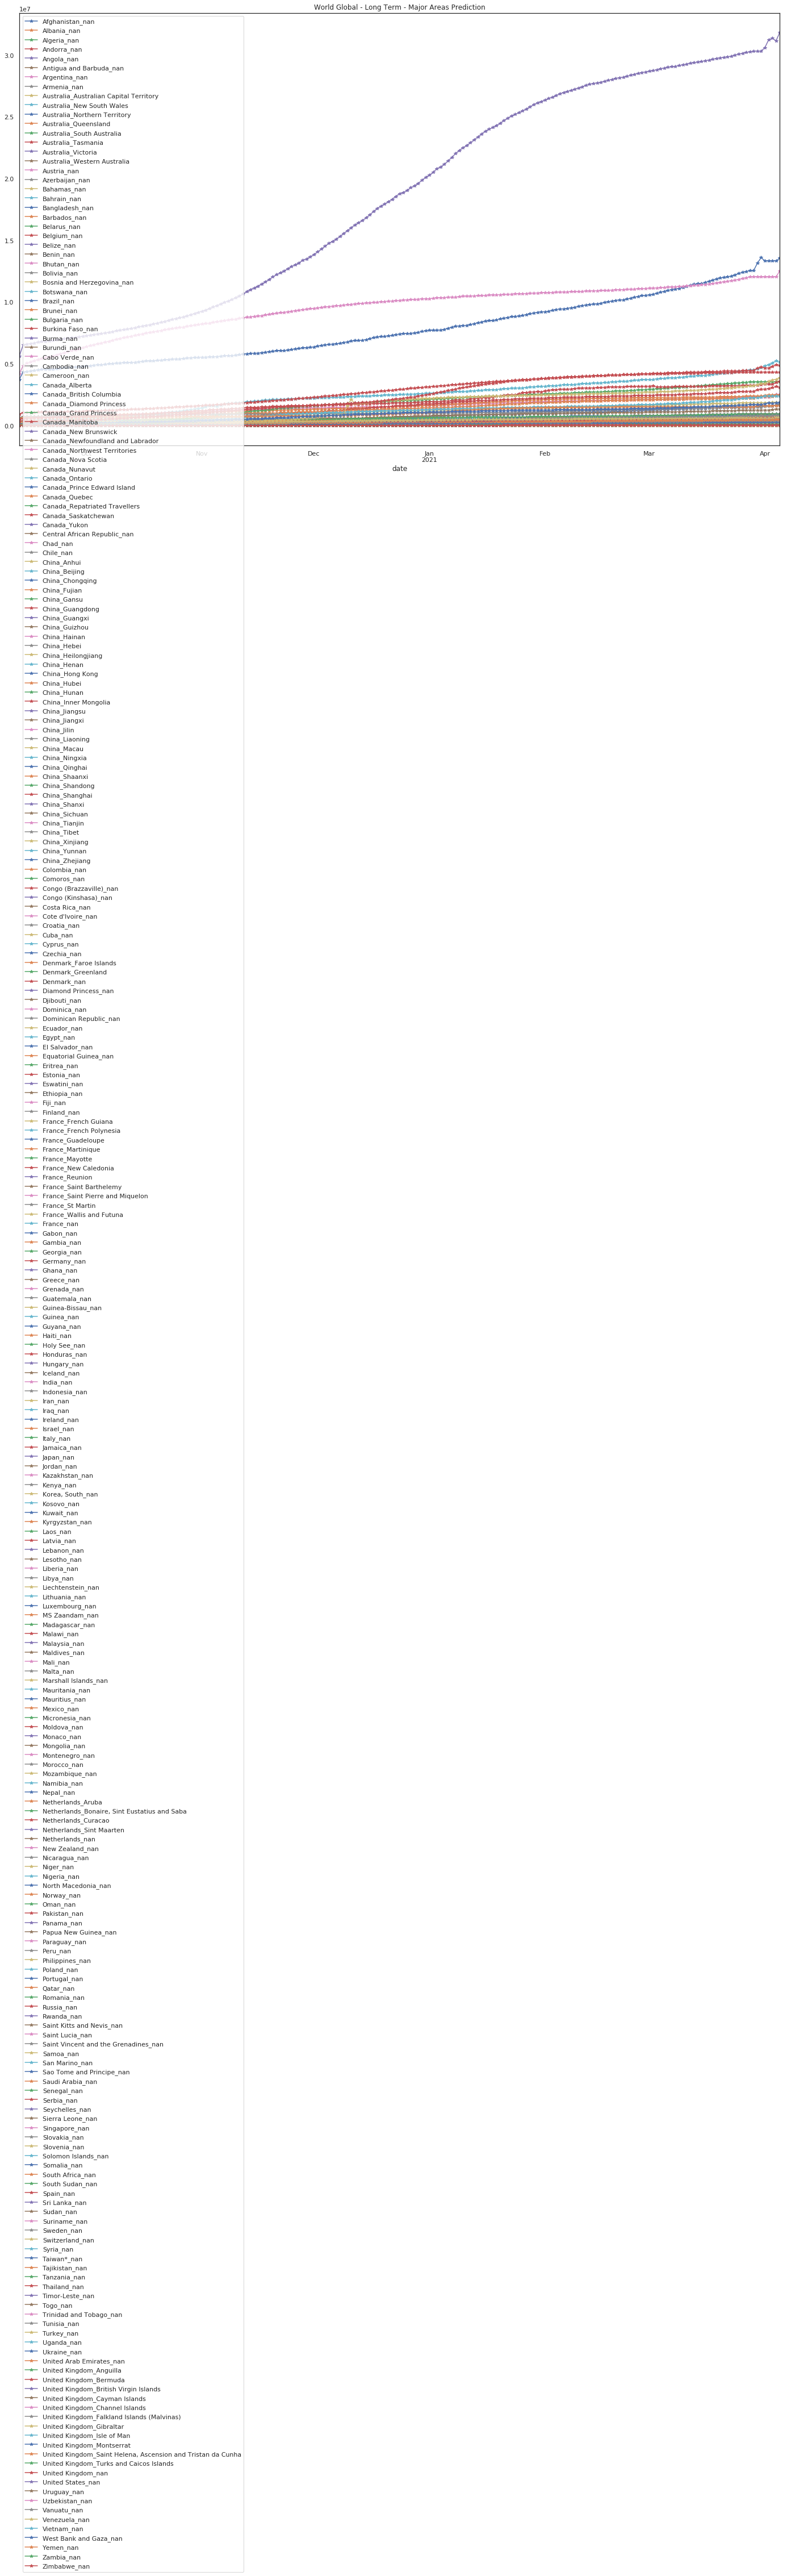

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41283.0      19997.0      57126.0       4418.0   
2020-10-29          41409.0      20261.0      57437.0       4517.0   
2020-10-30          41483.0      20602.0      57754.0       4672.0   
2020-10-31          41574.0      20830.0      58050.0       4665.0   
2020-11-01          41647.0      21194.0      58369.0       4756.0   
2020-11-02          41767.0      21466.0      58675.0       4825.0   
2020-11-03          41867.0      21845.0      59062.0       4888.0   
2020-11-04          41958.0      22219.0      59599.0       5113.0   
2020-11-05          42077.0      22638.0      60243.0       5045.0   
2020-11-06          42125.0      23115.0      60891.0       5135.0   
2020-11-07          42184.0      23582.0      61479.0       5496.0   
2020-11-08          42298.0      24088.0      62119.0       5319.0   
2020-11-09          42426.0      24616.0      62756.0       5383.0   
2020-11-10          42596.0      25163.0      63473.0       5484.0   
2020-11-11          42748.0      25666.0      64281.0       5564.0   
2020-11-12          42929.0      26119.0      65129.0       5567.0   
2020-11-13          43102.0      26633.0      66004.0       5689.0   
2020-11-14          43178.0      27117.0      66850.0       5725.0   
2020-11-15          43364.0      27694.0      67695.0       6001.0   
2020-11-16          43576.0      28292.0      68591.0       5872.0   
2020-11-17          43789.0      28988.0      69576.0       5953.0   
2020-11-18          44040.0      29682.0      70620.0       6048.0   
2020-11-19          44288.0      30464.0      71653.0       6018.0   
2020-11-20          44481.0      31280.0      72744.0       6103.0   
2020-11-21          44629.0      32025.0      73782.0       6142.0   
2020-11-22          44813.0      32645.0      74839.0       6207.0   
2020-11-23          45076.0      33438.0      75860.0       6277.0   
2020-11-24          45277.0      34119.0      76952.0       6318.0   
2020-11-25          45495.0      34795.0      78015.0       6388.0   
2020-11-26          45712.0      35490.0      79073.0       6428.0   
...                     ...          ...          ...          ...   
2021-03-07          56019.0     112884.0     114384.0      11019.0   
2021-03-08          56045.0     113604.0     114521.0      11042.0   
2021-03-09          56048.0     114204.0     114683.0      11069.0   
2021-03-10          56062.0     114828.0     114829.0      11089.0   
2021-03-11          56086.0     115437.0     114990.0      11130.0   
2021-03-12          56124.0     116109.0     115159.0      11185.0   
2021-03-13          56135.0     116836.0     115295.0      11199.0   
2021-03-14          56154.0     117509.0     115414.0      11228.0   
2021-03-15          56158.0     118069.0     115550.0      11266.0   
2021-03-16          56164.0     118524.0     115688.0      11289.0   
2021-03-17          56184.0     118952.0     115831.0      11319.0   
2021-03-18          56211.0     119512.0     115990.0      11360.0   
2021-03-19          56239.0     120063.0     116125.0      11393.0   
2021-03-20          56265.0     120565.0     116220.0      11431.0   
2021-03-21          56276.0     121228.0     116302.0      11481.0   
2021-03-22          56319.0     121658.0     116396.0      11517.0   
2021-03-23          56348.0     121883.0     116494.0      11545.0   
2021-03-24          56362.0     122297.0     116584.0      11591.0   
2021-03-25          56393.0     122792.0     116690.0      11638.0   
2021-03-26          56422.0     123267.0     116810.0      11687.0   
2021-03-27          56456.0     123701.0     116911.0      11732.0   
2021-03-28          56466.0     124182.0     116992.0      11809.0   
2021-03-29          56487.0     124527.0     117096.0      11850.0   
2021-03-30          56494.0     126407.0     117117.0      11936.0   
2021-03-31

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
250                                    Timor-Leste_nan  -8.874217  125.727539   
251                                           Togo_nan   8.619500    0.824800   
252                            Trinidad and Tobago_nan  10.691800  -61.222500   
253                                        Tunisia_nan  33.886917    9.537499   
254                                         Turkey_nan  38.963700   35.243300   
255                                  United States_nan  40.000000 -100.000000   
256                                         Uganda_nan   1.373333   32.290275   
257                                        Ukraine_nan  48.379400   31.165600   
258                           United Arab Emirates_nan  23.424076   53.847818   
259                            United Kingdom_Anguilla  18.220600  -63.068600   
260                             United Kingdom_Bermuda  32.307800  -64.750500   
261              United Kingdom_British Virgin Islands  18.420700  -64.640000   
262                      United Kingdom_Cayman Islands  19.313300  -81.254600   
263                     United Kingdom_Channel Islands  49.372300   -2.364400   
264         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
265                           United Kingdom_Gibraltar  36.140800   -5.353600   
266                         United Kingdom_Isle of Man  54.236100   -4.548100   
267                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      32              Bulgaria_nan  42.733900   25.485800   
7      51            Canada_Ontario  51.253800  -85.323200   
8      53             Canada_Quebec  52.939900  -73.549100   
9      59                 Chile_nan -35.675100  -71.543000   
10     93              Colombia_nan   4.570900  -74.297300   
11    102               Czechia_nan  49.817500   15.473000   
12    110               Ecuador_nan  -1.831200  -78.183400   
13    131                France_nan  46.227600    2.213700   
14    136               Germany_nan  51.165691   10.451526   
15    148               Hungary_nan  47.162500   19.503300   
16    150                 India_nan  20.593684   78.962880   
17    151             Indonesia_nan  -0.789300  113.921300   
18    152                  Iran_nan  32.427908   53.688046   
19    153                  Iraq_nan  33.223191   43.679291   
20    155                Israel_nan  31.046051   34.851612   
21    156                Israel_nan  31.046051   34.851612   
22    157                 Italy_nan  41.871940   12.567380   
23    159                 Japan_nan  36.204824  138.252924   
24    160                Jordan_nan  31.240000   36.510000   
25    161            Kazakhstan_nan  48.019600   66.923700   
26    169               Lebanon_nan  33.854700   35.862300   
27    170               Lebanon_nan  33.854700   35.862300   
28    180              Malaysia_nan   4.210484  101.975766   
29    187                Mexico_nan  23.634500 -102.552800   
30    193               Morocco_nan  31.791700   -7.092600   
31    201           Netherlands_nan  52.132600    5.291300   
32    209              Pakistan_nan  30.375300   69.345100   
33    210                Panama_nan   8.538000  -80.782100   
34    213                  Peru_nan  -9.190000  -75.015200   
35    214           Philippines_nan  12.879721  121.774017   
36    215                Poland_nan  51.919400   19.145100   
37    216              Portugal_nan  39.399900   -8.224500   
38    218               Romania_nan  45.943200   24.966800   
39    219                Russia_nan  61.524010  105.318756   
40    227          Saudi Arabia_nan  23.885942   45.079162   
41    229                Serbia_nan  44.016500   21.005900   
42    233              Slovakia_nan  48.669000   19.699000   
43    237          South Africa_nan -30.559500   22.937500   
44    239                 Spain_nan  40.463667   -3.749220   
45    243                Sweden_nan  60.128161   18.643501   
46    244           Switzerland_nan  46.818200    8.227500   
47    254                Turkey_nan  38.963700   35.243300   
48    255         United States_nan  40.000000 -100.000000   
49    257               Ukraine_nan  48.379400   31.165600   
50    258  United Arab Emirates_nan  23.424076   53.847818   
51    270        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              500200.0             555537.0             577756.0   
1               50108.0              50437.0              33541.0   
2              312352.0             337520.0             339389.0   
3               85446.0              85607.0              74360.0   
4              102060.0             102793.0              94306.0   
5             3752748.0            4330455.0            4381711.0   
6               36976.0              37099.0              18061.0   
7               61590.0              61952.0              46905.0   
8               77531.0              77768.0              65262.0   
9              396125.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()

In [94]:
num_days_R_prediction=14
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)
print(str(ndaysavg)+' '+str(ndayarray)+' '+str(n2dayarray))

14 -15 -29
